In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.formula.api as sm
import warnings
import missingno as msno 

import os

In [3]:
data = pd.read_excel('../Datos/2. Participants attributes.xlsx', sheet_name='IsBaru_Consolidado')  
data

,StartDate,EndDate,Status,Duration__in_seconds_,ID,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,...,Q8.25,Q8.27,Q8.28,Q8.29,Q8.30,Q8.31,Q8.32,Q8.33,Q15.6_8_TEXT___Topics,filter_$
0,2019-04-01 06:58:48,2019-04-01 08:52:35,4,6827,i1,R_cuSpN5GmBnd3Zbf,NaN,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,7.0,5.0,5.0,5.0,NaN,0.0
1,2019-04-01 06:54:47,2019-04-01 09:06:12,4,7884,i2,R_8eKk76I45k8XRv7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2019-04-01 07:01:01,2019-04-01 09:12:58,4,7916,i3,R_8B0wjdvYvFs4fdz,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,3.0,5.0,NaN,0.0
3,2019-04-01 06:59:07,2019-04-01 09:19:29,4,8421,i4,R_5tmgbFE4lw68Qn3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2019-04-01 06:51:46,2019-04-01 09:24:52,4,9186,i5,R_bvcjNKZ8oTmdy4J,NaN,NaN,NaN,NaN,...,1.0,2.0,5.0,4.0,3.0,4.0,3.0,3.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2019-04-05 07:38:14,2019-04-05 10:40:35,4,10941,i238,R_2gg1TkVlxFAesER,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
238,2019-04-05 07:56:32,2019-04-05 10:42:26,4,9954,i239,R_bEC6agcFYGYKJHn,NaN,NaN,NaN,NaN,...,5.0,1.0,2.0,3.0,4.0,4.0,1.0,1.0,NaN,1.0
239,2019-04-05 07:44:37,2019-04-05 10:46:22,4,10904,i240,R_5jSZzMR7jqssMtv,NaN,NaN,NaN,NaN,...,5.0,2.0,5.0,5.0,4.0,5.0,1.0,5.0,NaN,1.0
240,2019-04-05 07:45:21,2019-04-05 10:46:53,4,10891,i241,R_bO3hwtysSjcPYmV,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
# Q11.11 ¿What is your estatus?
Q00 = 'Q11.11'

# Q11.39 ¿Do you understand what is sexual intercourse?
Q0 = 'Q11.39'

# Q11.40 ¿Have you had sexual intercourse?
Q1 = 'Q11.40'

# Q11.41 ¿How old were you when you had your first sexual intercourse?
Q2 = 'Q11.41'

# Q11.44 The first time you had sex, was it under the influence of alcohol or drugs?
Q3 = 'Q11.44'

# Q11.42 The first time you had sex, did you or your partner do anything to prevent pregnancy?
Q4 = 'Q11.42'

# Q11.45 Have you had sex with your partner?
Q5 = 'Q11.45'

# Q11.46 Do you feel that having sex with your partner allows you to have a closer relationship between the two?
Q6 = 'Q11.46'

# Q11.47 Some people worry about sexually transmitted infections. How concerned were/are you , about getting a sexually transmitted disease by your partner?
Q7 = 'Q11.47'

# Q11.48 Some people worry about unwanted pregnancies. How concerned were/are you , about getting pregnant with your partner?
Q8 = 'Q11.48'

# Q11.49 Are you or your partner doing something to avoid pregnancy?
Q9 = 'Q11.49'

# Q11.53 Do you think you are going to have sex with someone in the next year?
Q10 = 'Q11.53'

preguntas_comp = [Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]

preguntas_base_df = data[['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
preguntas_base_df

,ID,Q3.11,Q3.5,Q11.11,Q11.39,Q11.40,Q11.41,Q11.44,Q11.42,Q11.45,Q11.46,Q11.47,Q11.48,Q11.49,Q11.53
0,i1,2.0,2,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i2,1.0,3,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,i3,2.0,1,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,i4,1.0,2,4.0,1.0,1.0,5.0,4.0,2.0,1.0,1.0,4.0,4.0,1.0,NaN
4,i5,2.0,1,10.0,1.0,1.0,5.0,1.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,i238,1.0,5,4.0,1.0,1.0,6.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
238,i239,2.0,3,10.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
239,i240,2.0,4,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,i241,1.0,4,6.0,1.0,1.0,6.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN


In [282]:
preguntas_base_df.columns = ['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year']

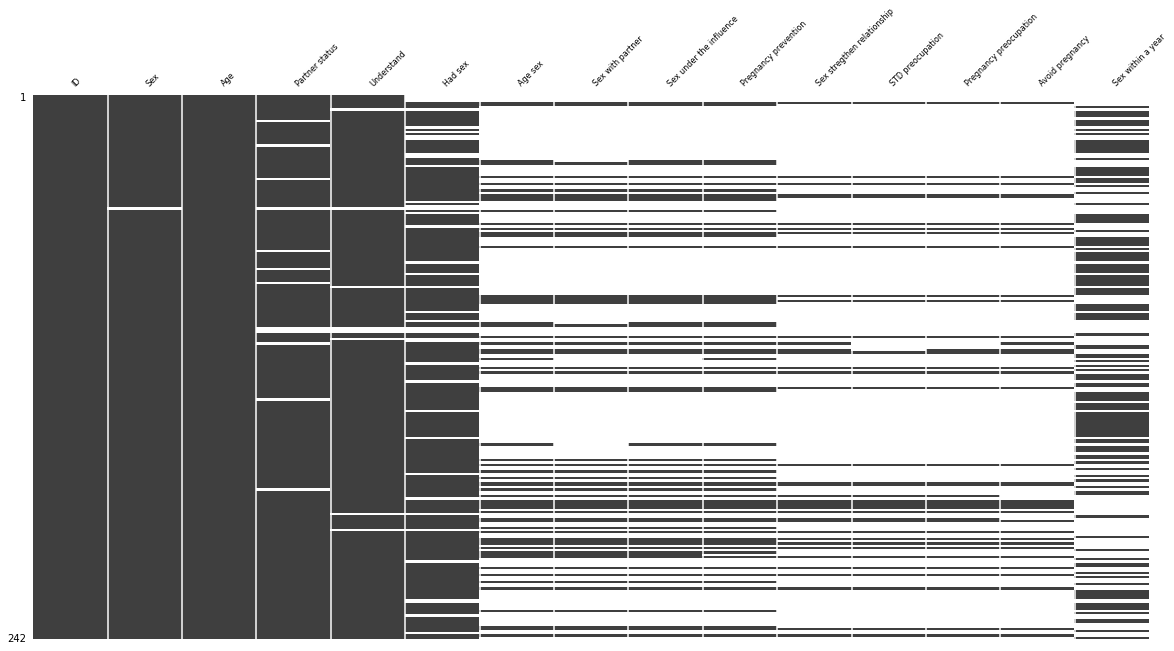

In [283]:
lo = msno.matrix(preguntas_base_df,figsize=(20,10), fontsize=8, sparkline=False)

In [284]:
print(preguntas_base_df.isnull().sum())
print(preguntas_base_df.isnull().sum()/preguntas_base_df.shape[0]*100)

ID                              0
Sex                             1
Age                             0
Partner status                 13
Understand                      9
Had sex                        39
Age sex                       178
Sex with partner              182
Sex under the influence       179
Pregnancy prevention          179
Sex stregthen relationship    203
STD preocupation              205
Pregnancy preocupation        204
Avoid pregnancy               205
Sex within a year             119
dtype: int64
ID                             0.000000
Sex                            0.413223
Age                            0.000000
Partner status                 5.371901
Understand                     3.719008
Had sex                       16.115702
Age sex                       73.553719
Sex with partner              75.206612
Sex under the influence       73.966942
Pregnancy prevention          73.966942
Sex stregthen relationship    83.884298
STD preocupation              84.7107

In [285]:
preguntas_base_df[preguntas_base_df['Sex within a year'].isnull()]

,ID,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
0,i1,2.0,2,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i2,1.0,3,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,i3,2.0,1,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,i4,1.0,2,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,NaN
4,i5,2.0,1,10.0,1.0,1.0,5.0,4.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,i236,2.0,3,3.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,i237,1.0,3,4.0,1.0,1.0,7.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
237,i238,1.0,5,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN
239,i240,2.0,4,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
## Categoria 1: Personas que no entienden que es el sexo
cat_1 = preguntas_base_df[preguntas_base_df['Understand'] == 2.0]
preguntas_base_df = preguntas_base_df[preguntas_base_df['Understand'] != 2.0]

## Categoria 2: Personas que no responde la pregunta sobre si saben que es el sexo 
# porque no sabe o porque no termino la encuesta
cat_2 = preguntas_base_df[preguntas_base_df['Understand'].isnull()]
preguntas_base_df = preguntas_base_df[~preguntas_base_df['Understand'].isnull()]

## Categoria 3: Personas que entienden que es el sexo pero no responden a la pregunta
# sobre tener sexo porque no saben o porque no terminaron la encuesta
cat_3 = preguntas_base_df[preguntas_base_df['Had sex'].isnull()]
preguntas_base_df = preguntas_base_df[~preguntas_base_df['Had sex'].isnull()]

## Categora 4: Personas que entienden que es el sexo pero no han tenido sexo
cat_4 = preguntas_base_df[preguntas_base_df['Had sex'] == 2.0]
preguntas_base_df = preguntas_base_df[preguntas_base_df['Had sex'] != 2.0]

## Categoria 5: Personas que entienden que es el sexo pero se niegan a contestar la pregunta/no entienden la pregunta
cat_5 = preguntas_base_df[preguntas_base_df['Had sex'].isin([3,4,5])]
preguntas_base_df = preguntas_base_df[~preguntas_base_df['Had sex'].isin([3,4,5])]

## Categoria 6: Tuvieron sexo pero NO con su pareja
cat_6 = preguntas_base_df[preguntas_base_df['Sex with partner'].isnull()]
preguntas_base_df = preguntas_base_df[~preguntas_base_df['Sex with partner'].isnull()]

## Categoria 7: Entienden que es sexo y tuvieron sexo pero NO con su pareja
cat_7 = preguntas_base_df[preguntas_base_df['Sex with partner'] == 2]
preguntas_base_df = preguntas_base_df[preguntas_base_df['Sex with partner'] != 2]

## Categoria 8: Tuvieron sexo pero no quieren contestar la pregunta de tener sexo con su pareja (posiblemente porque es problemático)
cat_8 = preguntas_base_df[preguntas_base_df['Sex with partner'].isin([3,4])]
preguntas_base_df = preguntas_base_df[~preguntas_base_df['Sex with partner'].isin([3,4])]

preguntas_base_df

,ID,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
3,i4,1.0,2,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,NaN
36,i37,1.0,2,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,NaN
39,i40,1.0,2,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN
44,i45,1.0,3,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,NaN
45,i46,1.0,3,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,NaN
57,i58,1.0,3,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,NaN
59,i60,1.0,1,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
61,i62,1.0,5,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,NaN
67,i68,1.0,4,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,NaN
89,i90,2.0,2,3.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0,NaN


In [287]:
preguntas_base_df[preguntas_base_df.iloc[:, -1].isnull()]

,ID,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
3,i4,1.0,2,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,NaN
36,i37,1.0,2,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,NaN
39,i40,1.0,2,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN
44,i45,1.0,3,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,NaN
45,i46,1.0,3,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,NaN
57,i58,1.0,3,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,NaN
59,i60,1.0,1,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
61,i62,1.0,5,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,NaN
67,i68,1.0,4,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,NaN
89,i90,2.0,2,3.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0,NaN


In [310]:
## Imputar datos

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(preguntas_base_df[~preguntas_base_df.iloc[:,range(1,14)].isnull().any(axis = 1)].iloc[:,range(1,14)])
IterativeImputer(random_state=0)
X_test = preguntas_base_df[preguntas_base_df.iloc[:,range(1,14)].isnull().any(axis = 1)].iloc[:,range(1,14)]

# the model learns that the second feature is double the first
data_imp = np.round(imp.transform(X_test))

In [313]:
index_imp = preguntas_base_df[preguntas_base_df.iloc[:,range(1,14)].isnull().any(axis = 1)].index

In [322]:
preguntas_base_df.loc[index_imp, 'Sex':'Avoid pregnancy'] = data_imp
preguntas_base_df

,ID,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
3,i4,1.0,2.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,NaN
36,i37,1.0,2.0,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,NaN
39,i40,1.0,2.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN
44,i45,1.0,3.0,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,NaN
45,i46,1.0,3.0,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,NaN
57,i58,1.0,3.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,NaN
59,i60,1.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
61,i62,1.0,5.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,NaN
67,i68,1.0,4.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,NaN
89,i90,2.0,2.0,3.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0,NaN


In [323]:
print(preguntas_base_df.isnull().sum())
print(preguntas_base_df.isnull().sum()/preguntas_base_df.shape[0]*100)

ID                             0
Sex                            0
Age                            0
Partner status                 0
Understand                     0
Had sex                        0
Age sex                        0
Sex with partner               0
Sex under the influence        0
Pregnancy prevention           0
Sex stregthen relationship     0
STD preocupation               0
Pregnancy preocupation         0
Avoid pregnancy                0
Sex within a year             39
dtype: int64
ID                              0.0
Sex                             0.0
Age                             0.0
Partner status                  0.0
Understand                      0.0
Had sex                         0.0
Age sex                         0.0
Sex with partner                0.0
Sex under the influence         0.0
Pregnancy prevention            0.0
Sex stregthen relationship      0.0
STD preocupation                0.0
Pregnancy preocupation          0.0
Avoid pregnancy         

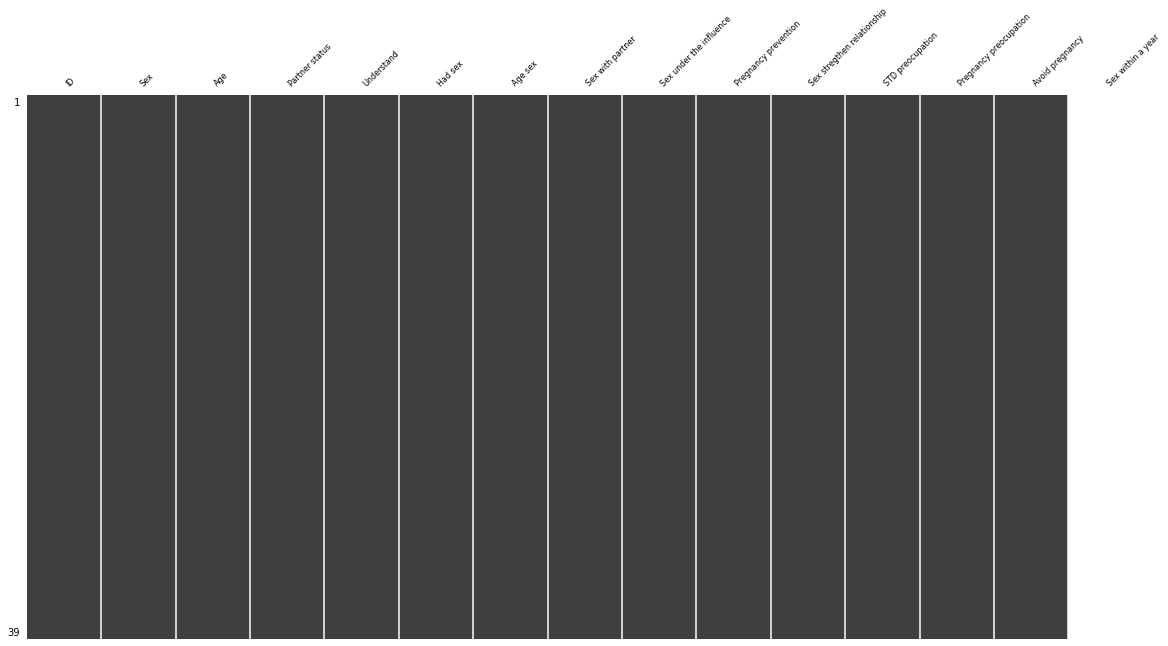

In [324]:
lo = msno.matrix(preguntas_base_df,figsize=(20,10), fontsize=8, sparkline=False)

In [ ]:
# Sacar del grupo categorizar 
# Grupo zanahorio
# Next y se pararon y se fueron categoria de respuesta adicional. 
# 

In [325]:
preguntas_base_df.Age.replace({1.0: 13,
                               2.0: 14,
                               3.0: 15,
                               4.0: 16,
                               5.0: 17}, inplace = True)
preguntas_base_df.Age

3      14.0
36     14.0
39     14.0
44     15.0
45     15.0
57     15.0
59     13.0
61     17.0
67     16.0
89     14.0
91     17.0
107    16.0
110    14.0
113    15.0
114    14.0
121    17.0
123    15.0
130    15.0
164    16.0
172    16.0
173    16.0
178    17.0
180    15.0
181    16.0
182    17.0
183    15.0
185    17.0
188    17.0
189    17.0
194    15.0
197    15.0
199    16.0
201    17.0
205    17.0
210    15.0
213    17.0
219    14.0
237    17.0
240    16.0
Name: Age, dtype: float64

In [326]:
preguntas_base_df.head()

,ID,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
3,i4,1.0,14.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,NaN
36,i37,1.0,14.0,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,NaN
39,i40,1.0,14.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN
44,i45,1.0,15.0,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,NaN
45,i46,1.0,15.0,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,NaN


In [327]:
print(preguntas_base_df.isnull().sum())
print(preguntas_base_df.isnull().sum()/preguntas_base_df.shape[0]*100)

ID                             0
Sex                            0
Age                            0
Partner status                 0
Understand                     0
Had sex                        0
Age sex                        0
Sex with partner               0
Sex under the influence        0
Pregnancy prevention           0
Sex stregthen relationship     0
STD preocupation               0
Pregnancy preocupation         0
Avoid pregnancy                0
Sex within a year             39
dtype: int64
ID                              0.0
Sex                             0.0
Age                             0.0
Partner status                  0.0
Understand                      0.0
Had sex                         0.0
Age sex                         0.0
Sex with partner                0.0
Sex under the influence         0.0
Pregnancy prevention            0.0
Sex stregthen relationship      0.0
STD preocupation                0.0
Pregnancy preocupation          0.0
Avoid pregnancy         

In [328]:
preguntas_base_df['Had sex'].value_counts()

1.0    39
Name: Had sex, dtype: int64

In [550]:
p_b_df = preguntas_base_df.drop(columns = ['ID', 'Sex within a year'])

In [551]:
p_b_df

,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy
3,1.0,14.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0
36,1.0,14.0,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0
39,1.0,14.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
44,1.0,15.0,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0
45,1.0,15.0,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0
57,1.0,15.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0
59,1.0,13.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
61,1.0,17.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0
67,1.0,16.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0
89,2.0,14.0,3.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0


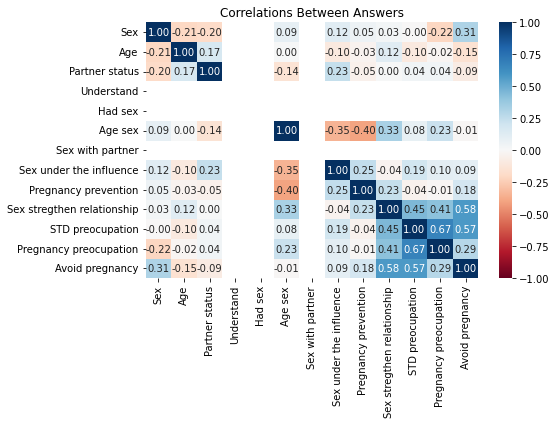

In [335]:
# Use Spearman instead of default Pearson, since these 
# are ordinal variables!
corr_matrix = p_b_df.corr(method='spearman')

# Setup
fig, ax = plt.subplots(figsize=(8, 6))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Answers")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

In [336]:
corr_matrix.fillna(0, inplace=True)

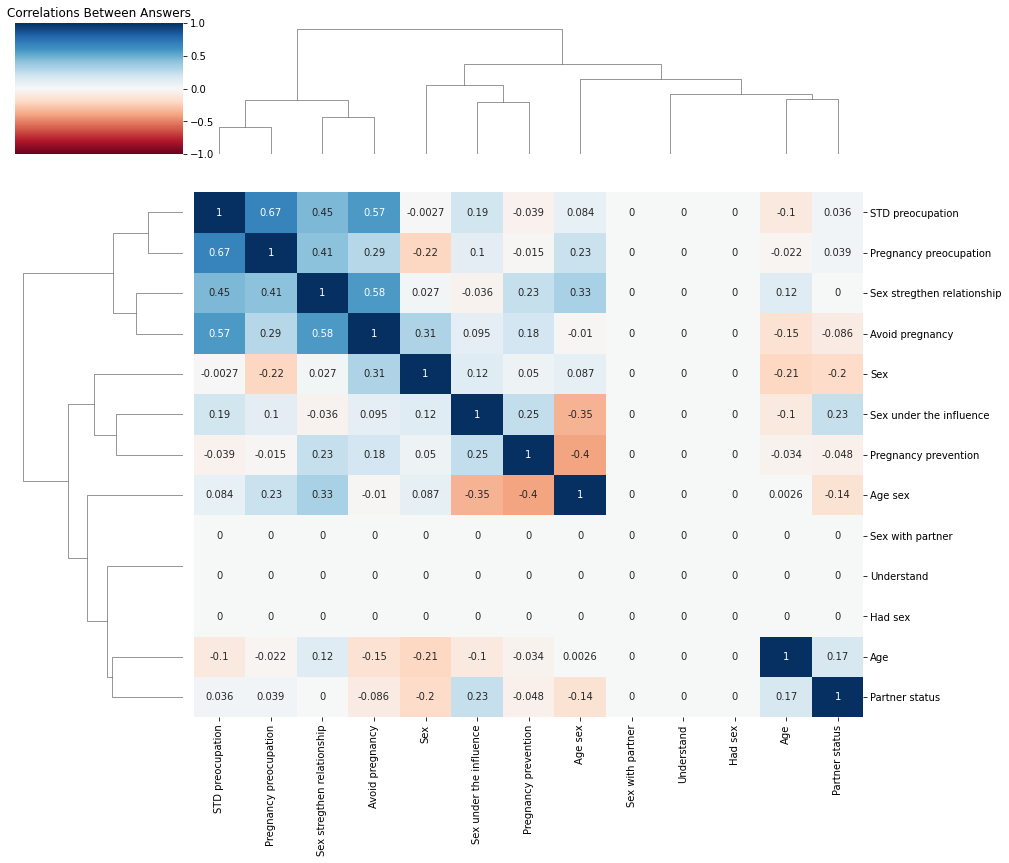

In [337]:
sns.clustermap(corr_matrix, method='ward', cmap='RdBu', annot=True,
               vmin=-1, vmax=1, figsize=(14,12))

plt.title("Correlations Between Answers")
plt.tight_layout()
plt.show()

In [532]:
preguntas_grouped = preguntas_base_df.groupby('Sex').agg('count')

preguntas_grouped

,ID,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
Sex,,,,,,,,,,,,,,
1.0,29,29,29,29,29,29,29,29,29,29,29,29,29,0
2.0,10,10,10,10,10,10,10,10,10,10,10,10,10,0


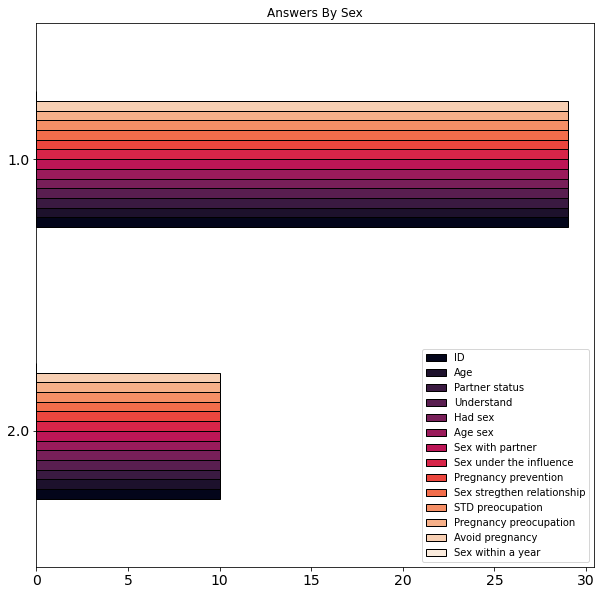

In [533]:
preguntas_grouped.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 10),
    cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Answers By Sex'
    ).yaxis.label.set_visible(False)

In [534]:
def plot_counts_by_age_group(groupby_count_obj, age_group, ax=None):
    
    """Takes a count-aggregated groupby object, an age group, and an 
    (optional) AxesSubplot, and draws a barplot for that group."""
    
    sort_order = groupby_count_obj.loc[age_group].sort_index().index

    sns.barplot(y = groupby_count_obj.loc[age_group].index, 
                x = groupby_count_obj.loc[age_group].values, 
                order = sort_order, 
                palette = 'rocket', edgecolor = 'black', 
                ax = ax
                ).set_title("Age {}".format(age_group))

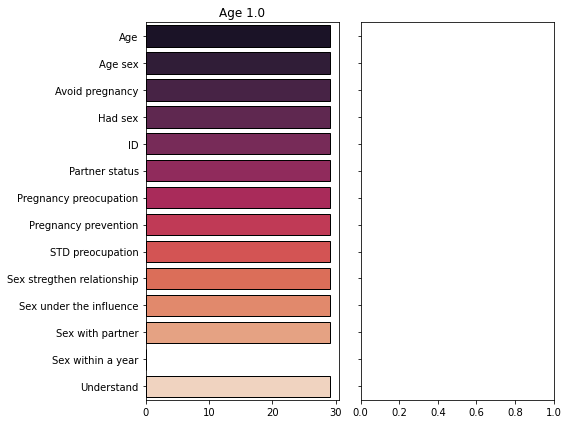

In [535]:
# Setup for the 2x2 subplot grid
# Note we don't want to share the x axis since we have counts
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6), sharey=True)

# ax.flatten() avoids having to explicitly reference a subplot index in ax
# Use consideration_grouped.index[:-1] because we're not plotting the under-30s
for subplot, age_group in zip(ax.flatten(), list(preguntas_grouped.index)[:-1]):
    plot_counts_by_age_group(preguntas_grouped, age_group, ax=subplot)
    
plt.tight_layout()

In [536]:
# Funcion para cambiar las preguntas decodificadas a el texto normal

data_i = pd.read_excel('../Datos/2. Participants attributes.xlsx', sheet_name='codebook', header = None)  
data_i.columns = ['ID_Pregunta', 'Pregunta_text', 'Respuestas_text', 'Number']
data_i.fillna(method='ffill', inplace=True)
data_i = data_i[2:]
data_i

,ID_Pregunta,Pregunta_text,Respuestas_text,Number
2,Q3.3,Your course:,Sixth grade (6),1
3,Q3.3,Your course:,Seventh grade (7),2
4,Q3.3,Your course:,Eighth grade (8),3
5,Q3.3,Your course:,Ninth grade (9),4
6,Q3.3,Your course:,Tenth grade (10),5
...,...,...,...,...
1455,Q8.33,¿Qué piensas que tus amigas harían si atravesa...,Continuar con el embarazo y quedarse con el bebé,1
1456,Q8.33,¿Qué piensas que tus amigas harían si atravesa...,Terminar la relación con Andrés y continuar co...,2
1457,Q8.33,¿Qué piensas que tus amigas harían si atravesa...,Pedirle a Andrés ayuda para conseguir el diner...,3
1458,Q8.33,¿Qué piensas que tus amigas harían si atravesa...,Pedirle a Andrés que la acompañe a abortar,4


In [537]:
mini = data_i[data_i.ID_Pregunta == Q1][['Number', 'Respuestas_text']]
mini['Number'] = mini.Number.astype(float)
mini = mini.set_index('Number').T.to_dict('records')
#df.set_index('ID').T.to_dict('list')
data[Q1].replace(mini[0])


0      NaN
1      NaN
2      NaN
3       Si
4       Si
      ... 
237     Si
238     No
239    NaN
240     Si
241     No
Name: Q11.40, Length: 242, dtype: object

In [538]:
data_t = data[['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
data_t

,ID,Q3.11,Q3.5,Q11.11,Q11.39,Q11.40,Q11.41,Q11.45,Q11.44,Q11.42,Q11.46,Q11.47,Q11.48,Q11.49,Q11.53
0,i1,2.0,2,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i2,1.0,3,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,i3,2.0,1,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,i4,1.0,2,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,NaN
4,i5,2.0,1,10.0,1.0,1.0,5.0,4.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,i238,1.0,5,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN
238,i239,2.0,3,10.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
239,i240,2.0,4,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,i241,1.0,4,6.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN


In [539]:
def cambiar_texto(q, base, base_t):
    mini = base_t[base_t.ID_Pregunta == q][['Number', 'Respuestas_text']]
    mini['Number'] = mini.Number.astype(float)
    mini = mini.set_index('Number').T.to_dict('records')
    #df.set_index('ID').T.to_dict('list')
    base[q].replace(mini[0], inplace = True)

In [540]:
for Q in ['Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]:
    cambiar_texto(Q, data_t, data_i)
data_t

/Users/isabellarodas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,ID,Q3.11,Q3.5,Q11.11,Q11.39,Q11.40,Q11.41,Q11.45,Q11.44,Q11.42,Q11.46,Q11.47,Q11.48,Q11.49,Q11.53
0,i1,Woman,14,Me niego a contestar,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i2,Man,15,Otra,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,i3,Woman,13,No sé,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,i4,Man,14,Yo tengo novia,Si entiendo,Si,13 años,Si,Me niego a contestar,No,Si,No preocupado,No preocupado,Si,NaN
4,i5,Woman,13,No sé,Si entiendo,Si,13 años,Me niego a contestar,Si,No sé,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,i238,Man,17,Yo tengo novia,Si entiendo,Si,14 años o mayor,Si,No,Si,Si,Muy preocupado,Muy preocupado,Si,NaN
238,i239,Woman,15,No sé,Si entiendo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No sé
239,i240,Woman,16,Yo tengo novio,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,i241,Man,16,Yo tengo más de una novia,Si entiendo,Si,14 años o mayor,Si,No,Si,Si,Un poco preocupado,Un poco preocupado,Si,NaN


In [541]:
preguntas = ['Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]
preguntas_t = ['Sex', 'Age', 'Partener status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
               'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 
               'Pregnancy preocupation','Avoid pregnancy', 'Sex within a year']

In [542]:
data_t.columns = ['ID', 'Sex', 'Age', 'Partener status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
               'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 
               'Pregnancy preocupation','Avoid pregnancy', 'Sex within a year']

In [543]:
data_t

,ID,Sex,Age,Partener status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
0,i1,Woman,14,Me niego a contestar,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i2,Man,15,Otra,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,i3,Woman,13,No sé,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,i4,Man,14,Yo tengo novia,Si entiendo,Si,13 años,Si,Me niego a contestar,No,Si,No preocupado,No preocupado,Si,NaN
4,i5,Woman,13,No sé,Si entiendo,Si,13 años,Me niego a contestar,Si,No sé,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,i238,Man,17,Yo tengo novia,Si entiendo,Si,14 años o mayor,Si,No,Si,Si,Muy preocupado,Muy preocupado,Si,NaN
238,i239,Woman,15,No sé,Si entiendo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No sé
239,i240,Woman,16,Yo tengo novio,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,i241,Man,16,Yo tengo más de una novia,Si entiendo,Si,14 años o mayor,Si,No,Si,Si,Un poco preocupado,Un poco preocupado,Si,NaN


In [544]:
def plot_benefit_question(df, col_name, age_group, type_m, order, palette='Spectral', ax=None):
    
    """Takes a relevant DataFrame, the name of the column (benefit) we want info on,
        and an age group, and returns a plot of the answers to that benefit question."""
    
    reduced_df = df[[col_name, type_m]]

    # Gets the relative frequencies (percentages) for "this-age-group" only
    data_to_plot = reduced_df[reduced_df[type_m] == age_group][col_name].value_counts(normalize=True)
    
    sns.barplot(y = data_to_plot.index, 
                x = data_to_plot.values,  
                ax = ax,
                order = order,
                palette = palette, 
                edgecolor = 'black'
                ).set_title('{} {}: {}'.format(type_m, age_group, col_name))

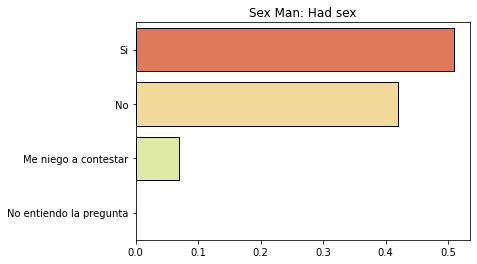

In [545]:
#[x for x in countries if x != 'nan']
plot_benefit_question(data_t, 'Had sex', 'Man', 'Sex', order = data_t['Had sex'].unique().tolist()[1:])

KeyError: "['Partner status'] not in index"

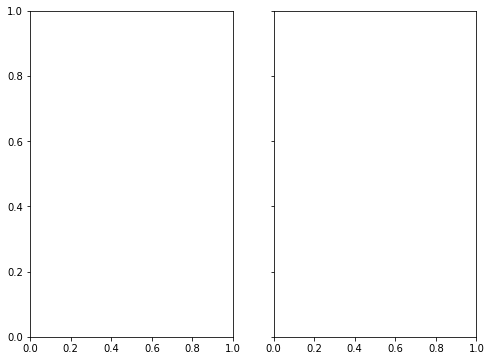

In [546]:
# Exclude age_group from the list of benefits
all_qs = list(preguntas_base_df.columns[3:])

for i, q in enumerate(all_qs):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6), 
                           sharey=True, sharex=True)

    for a, age_group in zip(ax.flatten(), ['Woman', 'Man']):
        plot_benefit_question(data_t, q, 
                              age_group = age_group, type_m = 'Sex', ax = a, 
                              order = data_i[data_i.ID_Pregunta == preguntas[2 + i]]['Respuestas_text'].to_list())
        
        # Keeps x-axis tick labels for each group of plots
        a.xaxis.set_tick_params(which='both', labelbottom=True)
        
        # Suppresses displaying the question along the y-axis
        a.yaxis.label.set_visible(False)
    
    #plt.savefig('sdbp_photos/{}_interest_by_age.png'.format(benefit))
    plt.tight_layout()

In [547]:
data_t.Age.unique()
data_i[data_i.ID_Pregunta == preguntas[1]]['Respuestas_text'].to_list()

['13', '14', 15, '16', '17']

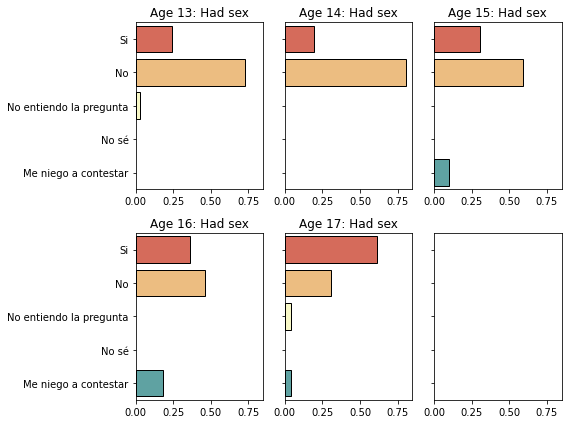

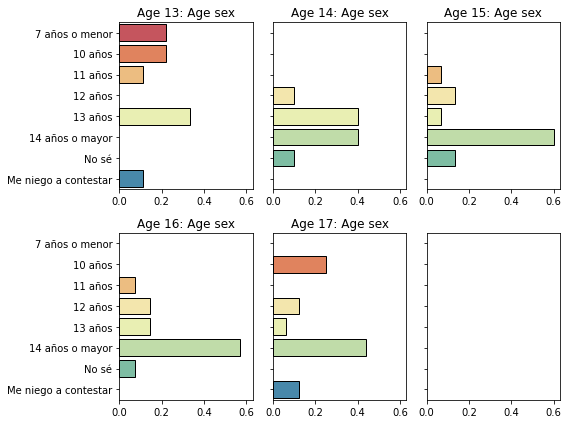

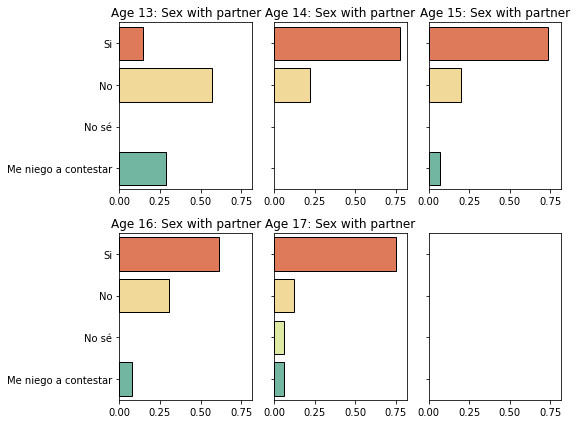

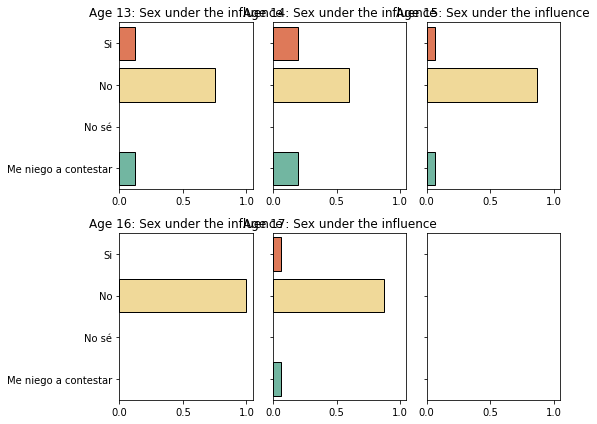

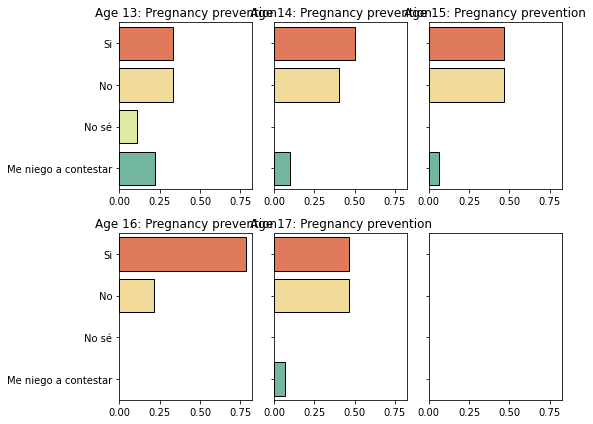

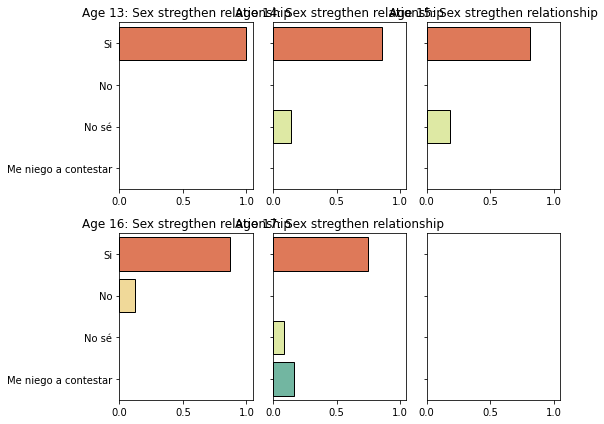

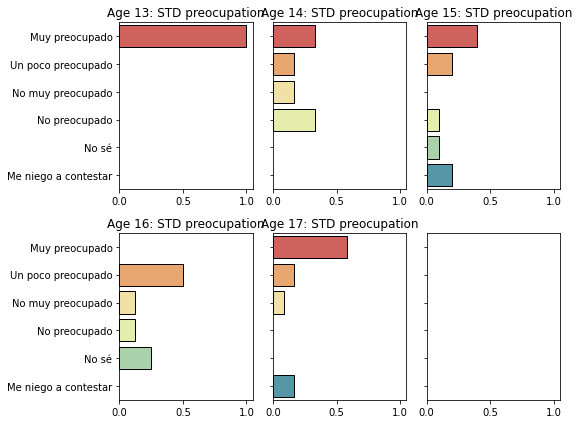

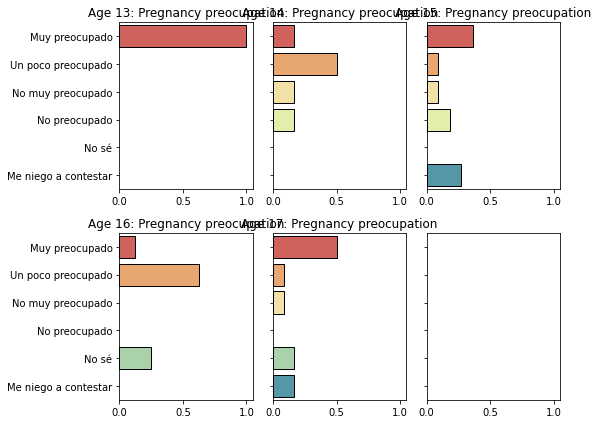

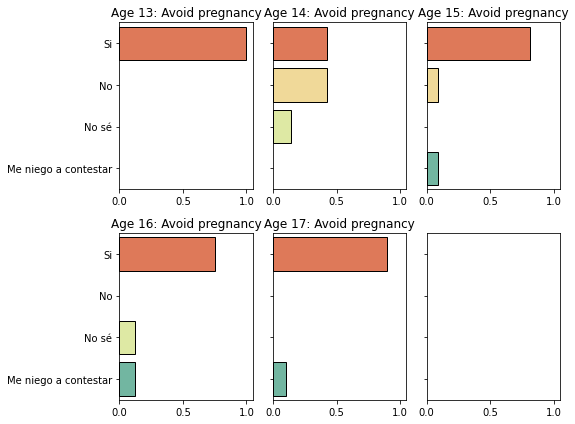

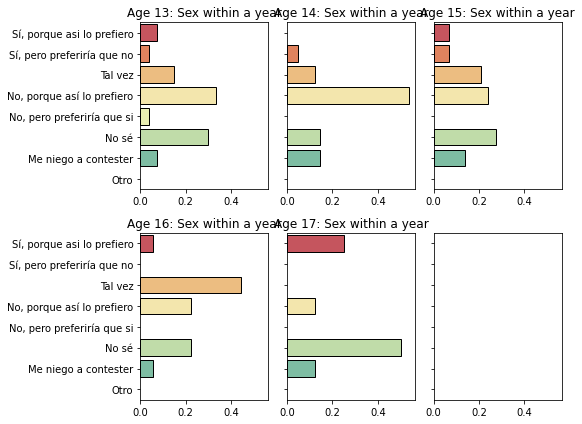

In [220]:
# Exclude age_group from the list of benefits
all_qs = list(preguntas_base_df.columns[3:])

for i, q in enumerate(all_qs):
    
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6), 
                           sharey=True, sharex=True)

    for a, age_group in zip(ax.flatten(), data_i[data_i.ID_Pregunta == preguntas[1]]['Respuestas_text'].to_list()):
        plot_benefit_question(data_t, q, 
                              age_group = age_group, type_m = 'Age', ax = a, 
                              order = data_i[data_i.ID_Pregunta == preguntas[2 + i]]['Respuestas_text'].to_list())
        
        # Keeps x-axis tick labels for each group of plots
        a.xaxis.set_tick_params(which='both', labelbottom=True)
        
        # Suppresses displaying the question along the y-axis
        a.yaxis.label.set_visible(False)
    
    #plt.savefig('sdbp_photos/{}_interest_by_age.png'.format(benefit))
    plt.tight_layout()

## Agrupar

In [552]:
p_b_df.fillna(0, inplace = True)

In [553]:
p_b_df = p_b_df.drop(columns=['Age']) 

In [554]:
## Agrupacion por k-modas

from kmodes.kmodes import KModes

# Iniciacion Cao

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)

fitClusters_cao = km_cao.fit_predict(p_b_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 117.0


In [555]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = p_b_df.columns

In [556]:
clusterCentroidsDf

,Sex,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy
0,1.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,2.0,3.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0


In [557]:
cost = []
for num_clusters in list(range(1,6)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(p_b_df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 111.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 101.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 96.0


Text(0.5, 1.0, 'Cost with Cao')

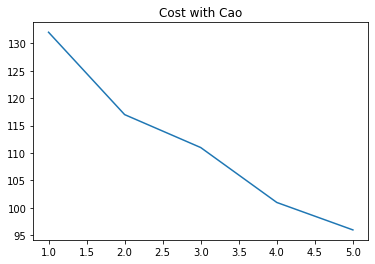

In [558]:
y = np.array([i for i in range(1,6,1)])
plt.plot(y,cost)
plt.title('Cost with Cao')

In [559]:
# k = 4
km_cao = KModes(n_clusters = 4, init = "Cao", n_init = 1, verbose = 1)
fitClusters_cao = km_cao.fit_predict(p_b_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 101.0


In [560]:
p_b_df_copy = p_b_df.reset_index()

In [561]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted_cao']

combinedDf = pd.concat([p_b_df_copy, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf

,Sex,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,cluster_predicted_cao
0,1.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,0
1,1.0,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,0
2,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0
3,1.0,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,0
4,1.0,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,0
5,1.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,0
6,1.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0
7,1.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,0
8,1.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,0
9,2.0,3.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0,1


In [562]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = p_b_df.columns
clusterCentroidsDf

,Sex,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy
0,1.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,2.0,3.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0
2,2.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,2.0,4.0,2.0,4.0
3,1.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,6.0,6.0,4.0


In [563]:
# Iniciacion Huang

km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(p_b_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 118.0
Run 1, iteration: 2/100, moves: 2, cost: 117.0
Run 1, iteration: 3/100, moves: 0, cost: 117.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 100.0
Run 1, iteration: 2/100, moves: 2, cost: 100.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 93.0
Run 1, iteration: 2/100, moves: 4, cost: 93.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 83.0
Run 1, iteration: 2/100, moves: 0, cost: 83.0


Text(0.5, 1.0, 'Cost with Huang')

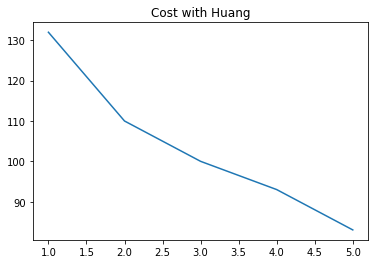

In [564]:
cost = []
for num_clusters in list(range(1,6)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(p_b_df)
    cost.append(kmode.cost_)
y = np.array([i for i in range(1,6,1)])
plt.plot(y,cost)
plt.title('Cost with Huang')

In [565]:
# k = 4
km_huang = KModes(n_clusters = 4, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(p_b_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 102.0
Run 1, iteration: 2/100, moves: 6, cost: 100.0
Run 1, iteration: 3/100, moves: 4, cost: 96.0
Run 1, iteration: 4/100, moves: 1, cost: 96.0


In [566]:
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = p_b_df.columns
clusterCentroidsDf

,Sex,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy
0,1.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
1,2.0,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
2,1.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
3,1.0,4.0,1.0,1.0,6.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0


In [567]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted_huang']

combinedDf = pd.concat([combinedDf, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)
combinedDf

,Sex,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,cluster_predicted_cao,cluster_predicted_huang
0,1.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,0,2
1,1.0,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,0,0
2,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0,0
3,1.0,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,0,2
4,1.0,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,0,0
5,1.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,0,0
6,1.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0,2
7,1.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,0,0
8,1.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,0,0
9,2.0,3.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0,1,1


In [568]:
preguntas_base_df

,ID,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
3,i4,1.0,14.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,NaN
36,i37,1.0,14.0,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,NaN
39,i40,1.0,14.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN
44,i45,1.0,15.0,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,NaN
45,i46,1.0,15.0,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,NaN
57,i58,1.0,15.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,NaN
59,i60,1.0,13.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
61,i62,1.0,17.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,NaN
67,i68,1.0,16.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,NaN
89,i90,2.0,14.0,3.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0,NaN


In [569]:
# Me voy a ir por el de Huang 

final_df = combinedDf.copy()
final_df['ID'] = preguntas_base_df.reset_index()['ID']
final_df['Age'] = preguntas_base_df.reset_index()['Age']
final_df['Sex within a year'] = preguntas_base_df.reset_index()['Sex within a year']
final_df = final_df[['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year', 'cluster_predicted_cao', 'cluster_predicted_huang']]
final_df

,ID,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year,cluster_predicted_cao,cluster_predicted_huang
0,i4,1.0,14.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,NaN,0,2
1,i37,1.0,14.0,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,NaN,0,0
2,i40,1.0,14.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,0,0
3,i45,1.0,15.0,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,NaN,0,2
4,i46,1.0,15.0,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,NaN,0,0
5,i58,1.0,15.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,NaN,0,0
6,i60,1.0,13.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,0,2
7,i62,1.0,17.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,NaN,0,0
8,i68,1.0,16.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,NaN,0,0
9,i90,2.0,14.0,3.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0,NaN,1,1


In [570]:
final_df.groupby(['cluster_predicted_cao']).agg(pd.Series.mode)

,ID,Sex,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,cluster_predicted_huang
cluster_predicted_cao,,,,,,,,,,,,,,
0,"[i108, i114, i124, i131, i165, i173, i179, i18...",1.0,4.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0
1,"[i111, i115, i90]",2.0,3.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,1
2,i174,2.0,7.0,1.0,1.0,6.0,1.0,2.0,1.0,2.0,4.0,2.0,4.0,0
3,"[i122, i189, i195]",1.0,4.0,1.0,1.0,"[2.0, 6.0, 8.0]",1.0,2.0,2.0,4.0,6.0,6.0,4.0,"[1, 2, 3]"


In [571]:
final_df['cluster_predicted_cao'] = final_df['cluster_predicted_cao'] + 6
final_df['cluster_predicted_huang'] = final_df['cluster_predicted_huang'] + 6

In [572]:
aux = data[data.ID.isin(cat_1.ID)][['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
aux.columns = ['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year']

aux[['cluster_predicted_cao', 'cluster_predicted_huang']] = 1

final_df = final_df.append(aux)

aux = data[data.ID.isin(cat_2.ID)][['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
aux.columns = ['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year']

aux[['cluster_predicted_cao', 'cluster_predicted_huang']] = 0

final_df = final_df.append(aux)


aux = data[data.ID.isin(cat_3.ID)][['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
aux.columns = ['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year']

aux[['cluster_predicted_cao', 'cluster_predicted_huang']] = 0

final_df = final_df.append(aux)

aux = data[data.ID.isin(cat_4.ID)][['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
aux.columns = ['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year']

aux[['cluster_predicted_cao', 'cluster_predicted_huang']] = 2

final_df = final_df.append(aux)

aux = data[data.ID.isin(cat_5.ID)][['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
aux.columns = ['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year']

aux[['cluster_predicted_cao', 'cluster_predicted_huang']] = 3

final_df = final_df.append(aux)


aux = data[data.ID.isin(cat_6.ID)][['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
aux.columns = ['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year']

aux[['cluster_predicted_cao', 'cluster_predicted_huang']] = 0

final_df = final_df.append(aux)


aux = data[data.ID.isin(cat_7.ID)][['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
aux.columns = ['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year']

aux[['cluster_predicted_cao', 'cluster_predicted_huang']] = 4

final_df = final_df.append(aux)

aux = data[data.ID.isin(cat_8.ID)][['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
aux.columns = ['ID', 'Sex', 'Age', 'Partner status', 'Understand', 'Had sex', 'Age sex', 'Sex with partner', 'Sex under the influence',
                            'Pregnancy prevention', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation',
                            'Avoid pregnancy', 'Sex within a year']

aux[['cluster_predicted_cao', 'cluster_predicted_huang']] = 5

final_df = final_df.append(aux)






In [573]:
final_df

,ID,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year,cluster_predicted_cao,cluster_predicted_huang
0,i4,1.0,14.0,4.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,4.0,4.0,1.0,NaN,6,8
1,i37,1.0,14.0,4.0,1.0,1.0,7.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,NaN,6,6
2,i40,1.0,14.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,6,6
3,i45,1.0,15.0,4.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,5.0,1.0,2.0,NaN,6,8
4,i46,1.0,15.0,3.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,NaN,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,i63,1.0,1.0,7.0,1.0,1.0,8.0,4.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,5,5
170,i171,1.0,4.0,4.0,1.0,1.0,6.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5,5
192,i193,1.0,3.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,5,5
204,i205,1.0,5.0,4.0,1.0,1.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5,5


In [574]:
#final_df.loc[final_df.cluster_predicted_huang.isin([2,3,6]), 'cluster_predicted_huang'] = 2
#final_df.loc[final_df.cluster_predicted_huang.isin([2,3,6]), 'cluster_predicted_cao'] = 2
final_df.loc[final_df.cluster_predicted_huang.isin([0])]

,ID,Sex,Age,Partner status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year,cluster_predicted_cao,cluster_predicted_huang
6,i7,1.0,4.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
50,i51,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
85,i86,2.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
103,i104,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
104,i105,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
105,i106,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
108,i109,1.0,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
186,i187,1.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
193,i194,1.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
74,i75,1.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [575]:
data_t

,ID,Sex,Age,Partener status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
0,i1,Woman,14,Me niego a contestar,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i2,Man,15,Otra,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,i3,Woman,13,No sé,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,i4,Man,14,Yo tengo novia,Si entiendo,Si,13 años,Si,Me niego a contestar,No,Si,No preocupado,No preocupado,Si,NaN
4,i5,Woman,13,No sé,Si entiendo,Si,13 años,Me niego a contestar,Si,No sé,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,i238,Man,17,Yo tengo novia,Si entiendo,Si,14 años o mayor,Si,No,Si,Si,Muy preocupado,Muy preocupado,Si,NaN
238,i239,Woman,15,No sé,Si entiendo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No sé
239,i240,Woman,16,Yo tengo novio,No entiendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,i241,Man,16,Yo tengo más de una novia,Si entiendo,Si,14 años o mayor,Si,No,Si,Si,Un poco preocupado,Un poco preocupado,Si,NaN


In [576]:
data_t['cluster_predicted_cao'] = final_df.reset_index()['cluster_predicted_cao']
data_t['cluster_predicted_huang'] = final_df.reset_index()['cluster_predicted_huang']
data_t = data_t.fillna('N/A')
data_t

/var/folders/qt/qfq6zl8j7d92s9zt_xt9h3tm0000gn/T/ipykernel_93571/3382034722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t['cluster_predicted_cao'] = final_df.reset_index()['cluster_predicted_cao']
/var/folders/qt/qfq6zl8j7d92s9zt_xt9h3tm0000gn/T/ipykernel_93571/3382034722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t['cluster_predicted_huang'] = final_df.reset_index()['cluster_predicted_huang']


,ID,Sex,Age,Partener status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year,cluster_predicted_cao,cluster_predicted_huang
0,i1,Woman,14,Me niego a contestar,No entiendo,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,6,8
1,i2,Man,15,Otra,No entiendo,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,6,6
2,i3,Woman,13,No sé,No entiendo,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,6,6
3,i4,Man,14,Yo tengo novia,Si entiendo,Si,13 años,Si,Me niego a contestar,No,Si,No preocupado,No preocupado,Si,N/A,6,8
4,i5,Woman,13,No sé,Si entiendo,Si,13 años,Me niego a contestar,Si,No sé,N/A,N/A,N/A,N/A,N/A,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,i238,Man,17,Yo tengo novia,Si entiendo,Si,14 años o mayor,Si,No,Si,Si,Muy preocupado,Muy preocupado,Si,N/A,5,5
238,i239,Woman,15,No sé,Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,No sé,5,5
239,i240,Woman,16,Yo tengo novio,No entiendo,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,5,5
240,i241,Man,16,Yo tengo más de una novia,Si entiendo,Si,14 años o mayor,Si,No,Si,Si,Un poco preocupado,Un poco preocupado,Si,N/A,5,5


In [577]:
# Distancia de gower

import gower

In [578]:
gower_df = data_t[data_t.cluster_predicted_cao > 5].reset_index()
gower_df = gower_df.drop(columns = ['ID', 'Age', 'cluster_predicted_cao', 'cluster_predicted_huang'])

gower_df

,index,Sex,Partener status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year
0,0,Woman,Me niego a contestar,No entiendo,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,1,Man,Otra,No entiendo,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2,2,Woman,No sé,No entiendo,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,3,Man,Yo tengo novia,Si entiendo,Si,13 años,Si,Me niego a contestar,No,Si,No preocupado,No preocupado,Si,N/A
4,4,Woman,No sé,Si entiendo,Si,13 años,Me niego a contestar,Si,No sé,N/A,N/A,N/A,N/A,N/A
5,5,Woman,Yo tengo novia,Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,"Sí, pero preferiría que no"
6,6,Man,Me niego a contestar,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
7,7,Man,Yo tengo novia,Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,"Sí, porque asi lo prefiero"
8,8,Woman,"Actualmente no estoy en una relación, pero si ...",Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,No sé
9,9,Woman,Nunca he estado en una relación romántica,Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,"No, porque así lo prefiero"


In [579]:
distance_matrix = gower.gower_matrix(gower_df)

In [580]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.3, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe

#data_t["cluster_DBSCAN"] = dbscan_cluster.labels_

DBSCAN(eps=0.3, metric='precomputed', min_samples=2)

In [582]:
la = dbscan_cluster.labels_ + 6
la 

array([6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 5, 6, 6])

In [583]:
np.append(la, data_t[data_t.cluster_predicted_huang <= 5]['cluster_predicted_huang'])

array([6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 5, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5])

In [584]:
data_t["cluster_DBSCAN"] = np.append(la, data_t[data_t.cluster_predicted_huang <= 5]['cluster_predicted_huang'])
#la

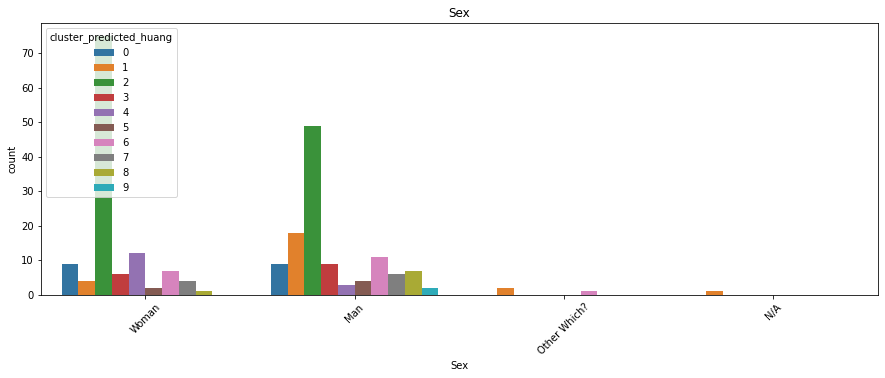

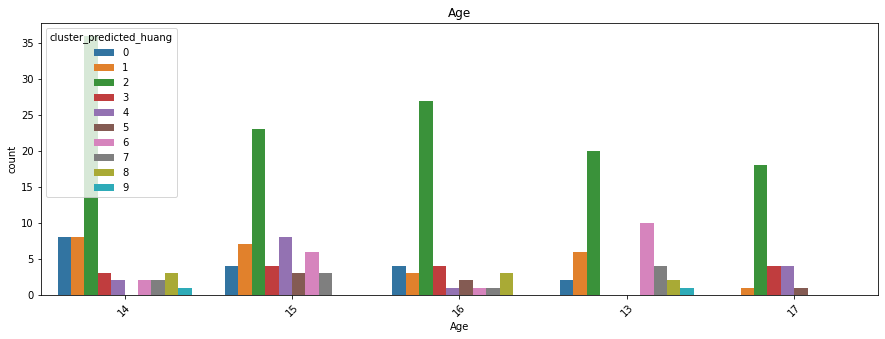

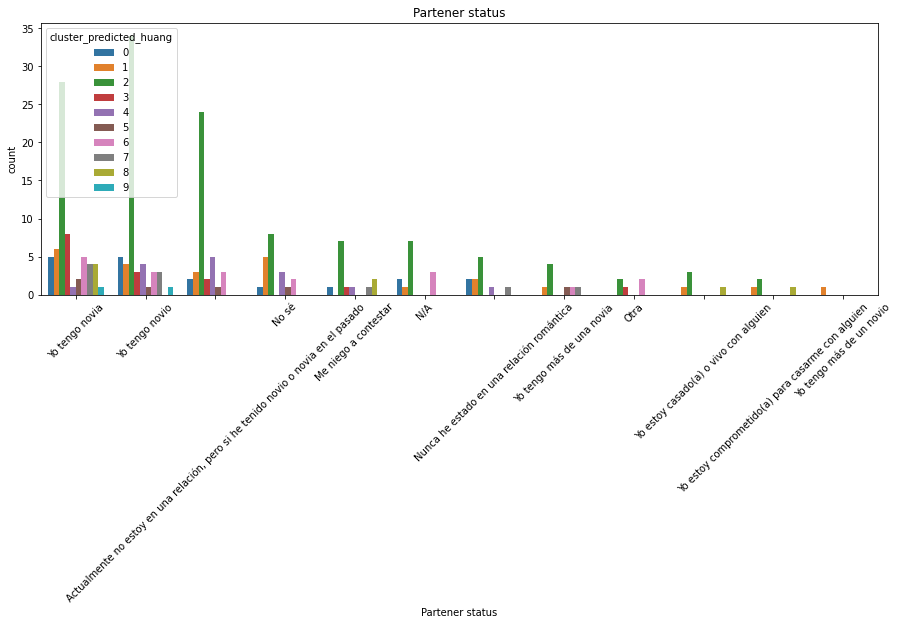

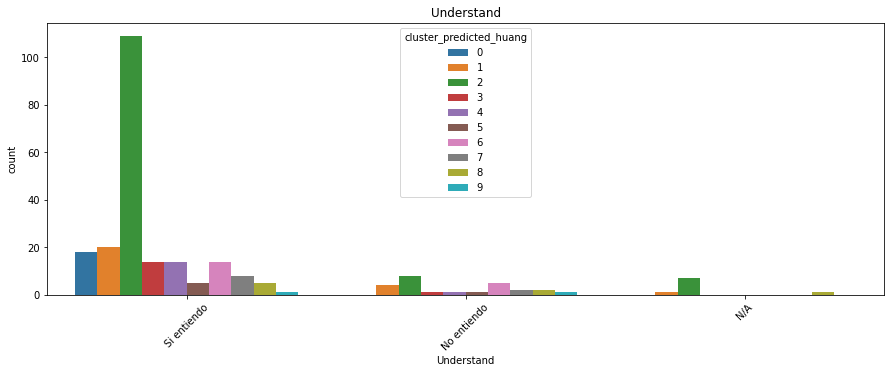

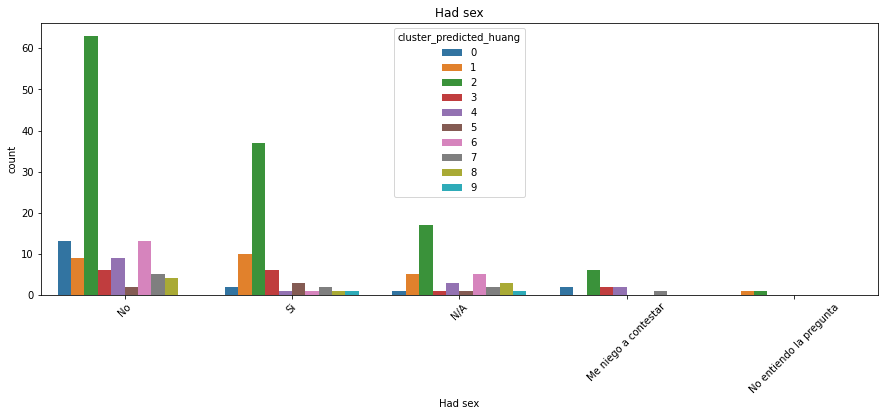

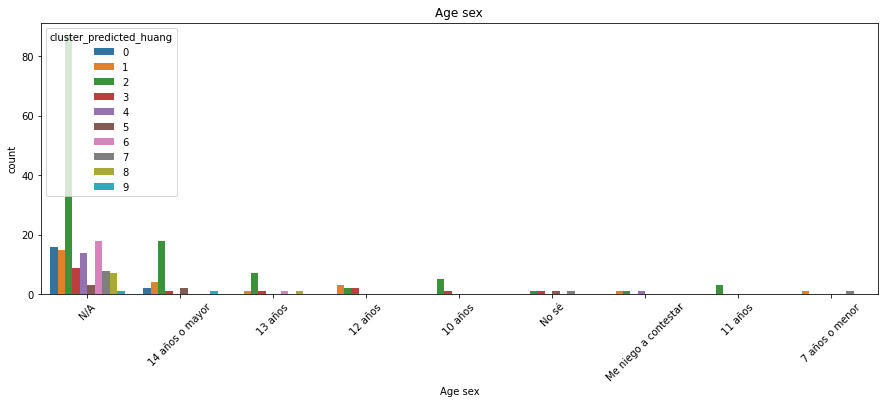

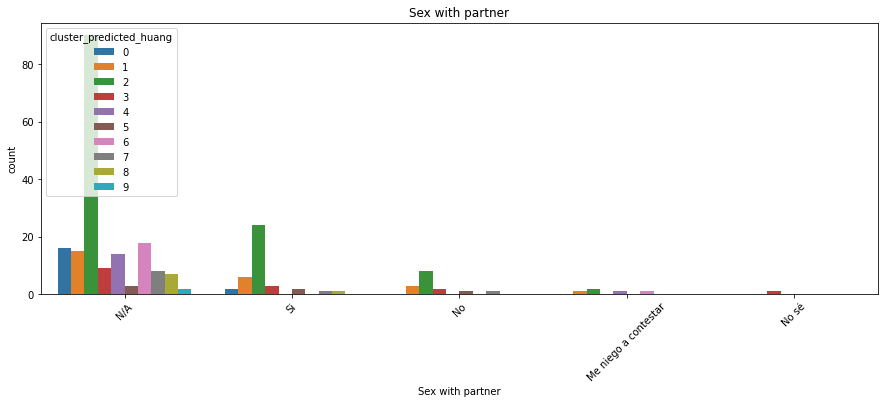

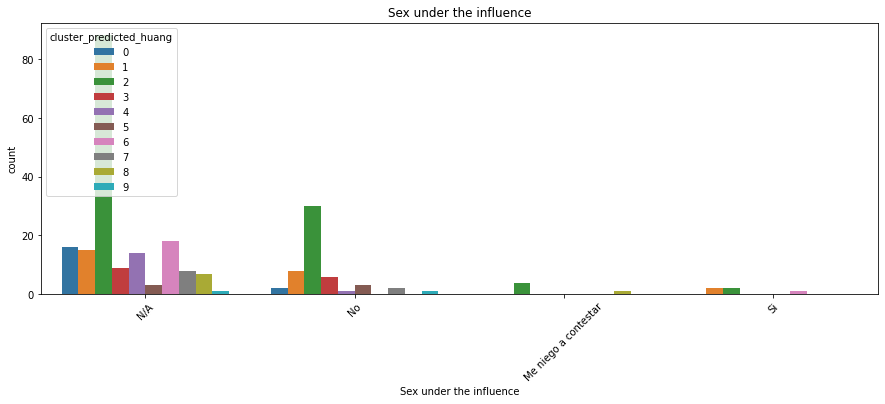

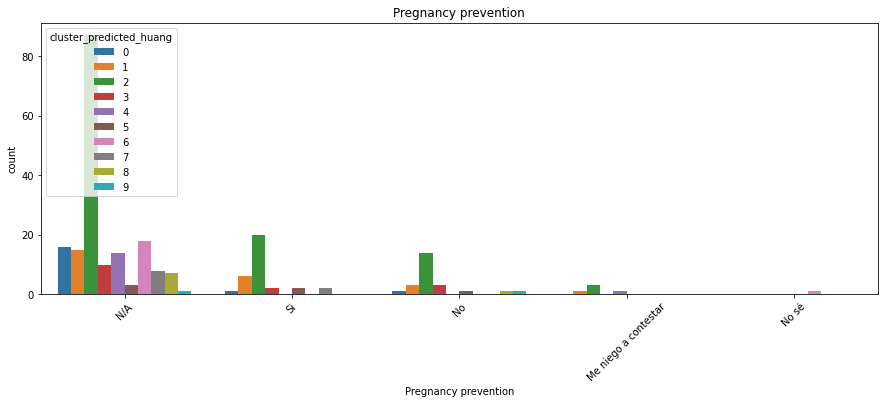

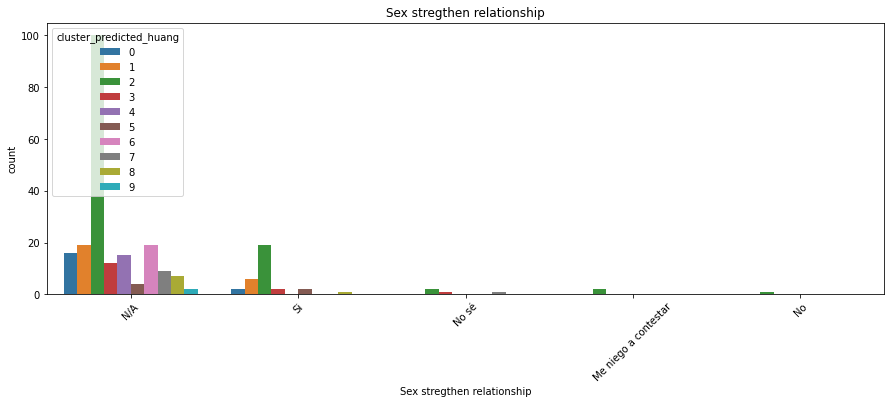

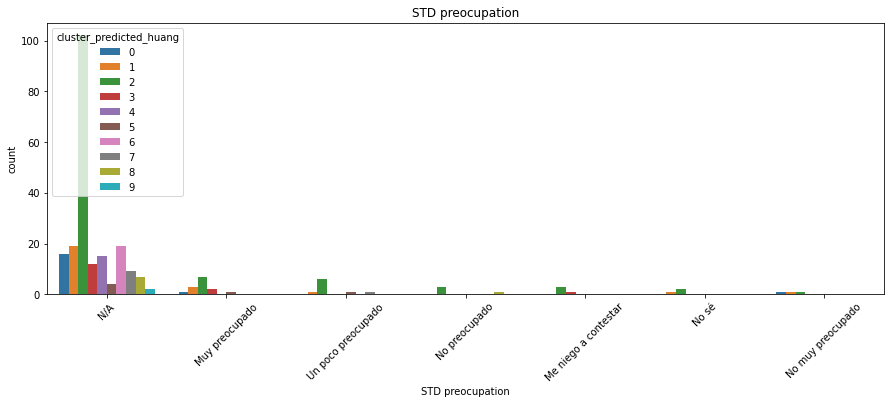

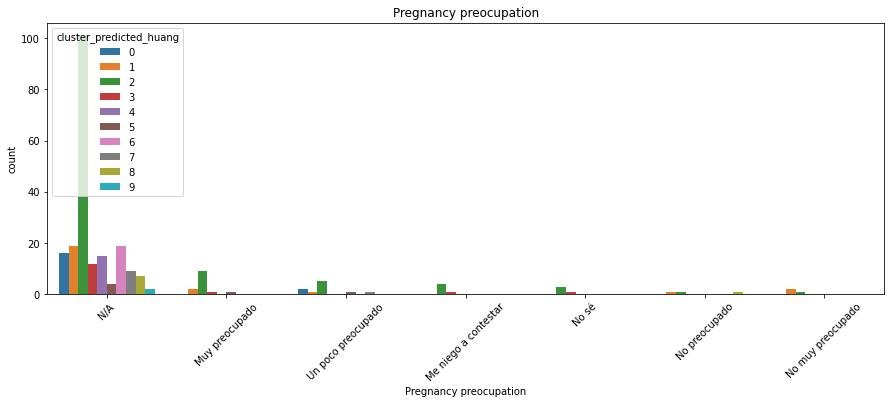

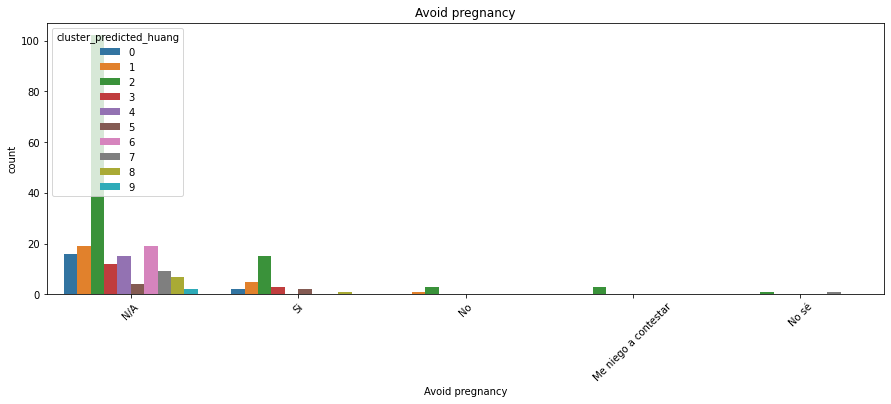

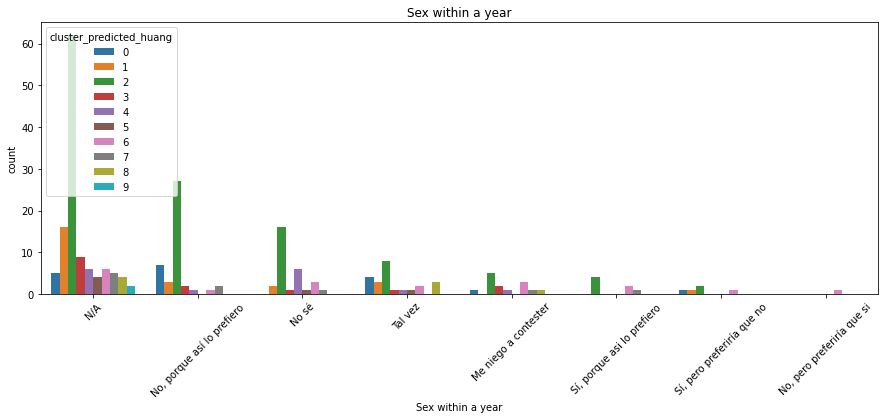

In [585]:
for i in preguntas_t:
    plt.subplots(figsize = (15,5))
    chart = sns.countplot(x = data_t[i],
                  order = data_t[i].value_counts().index,
                  hue = data_t['cluster_predicted_huang'])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title(i)
    plt.show()

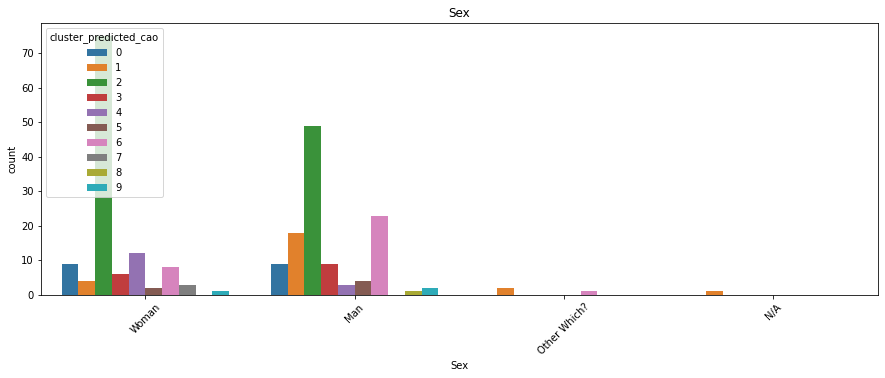

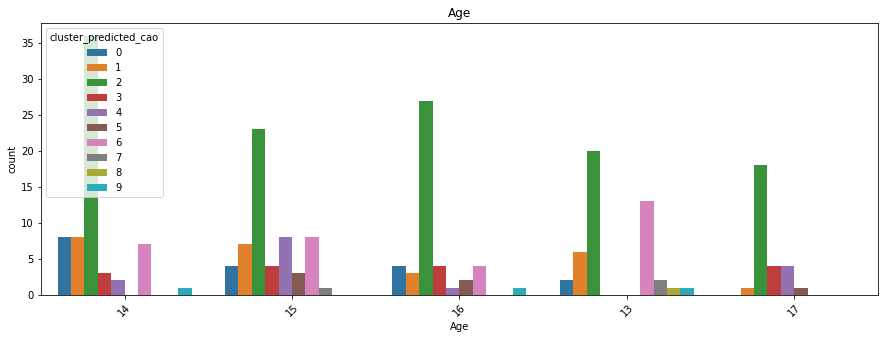

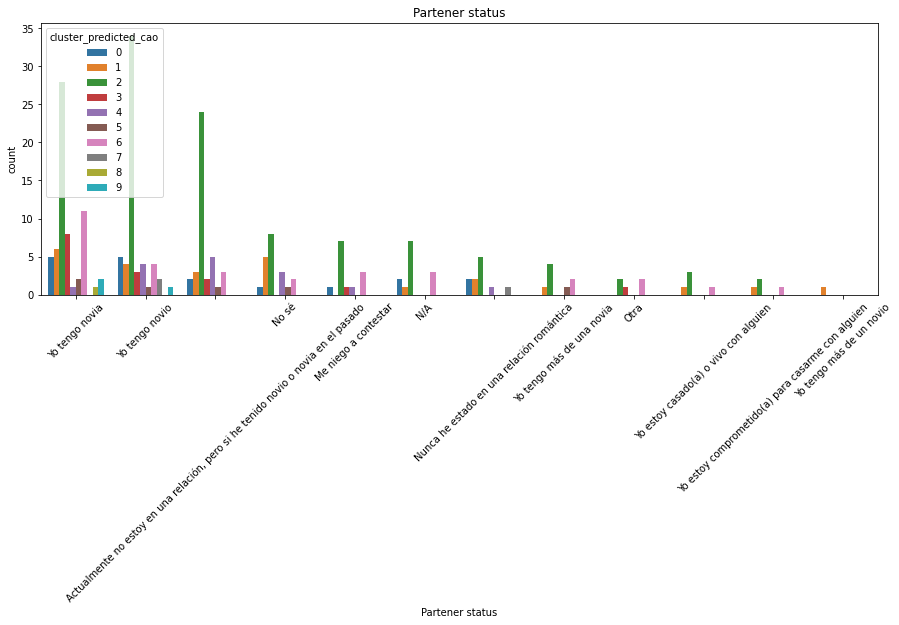

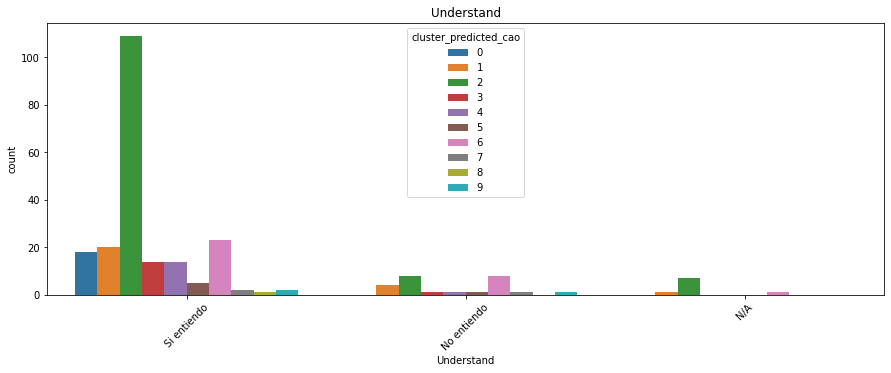

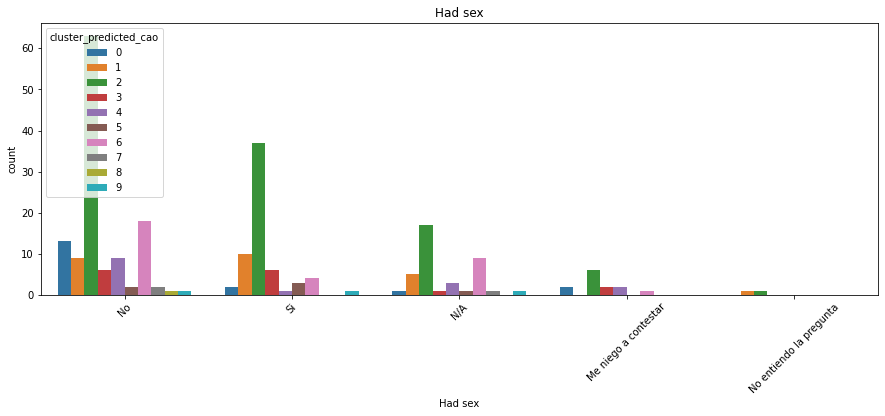

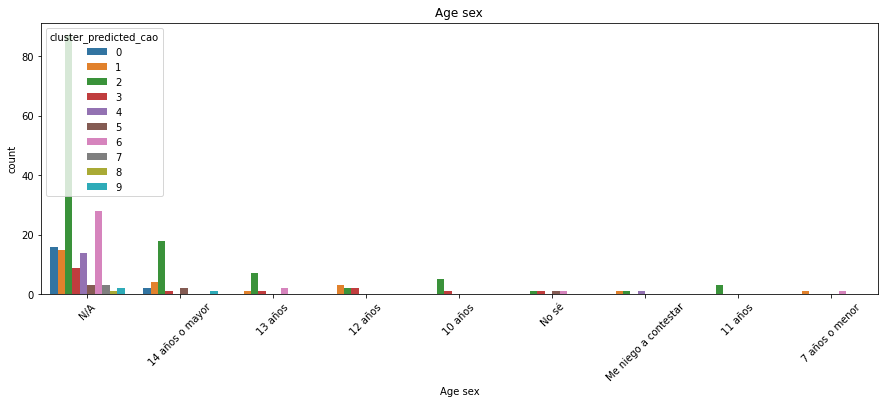

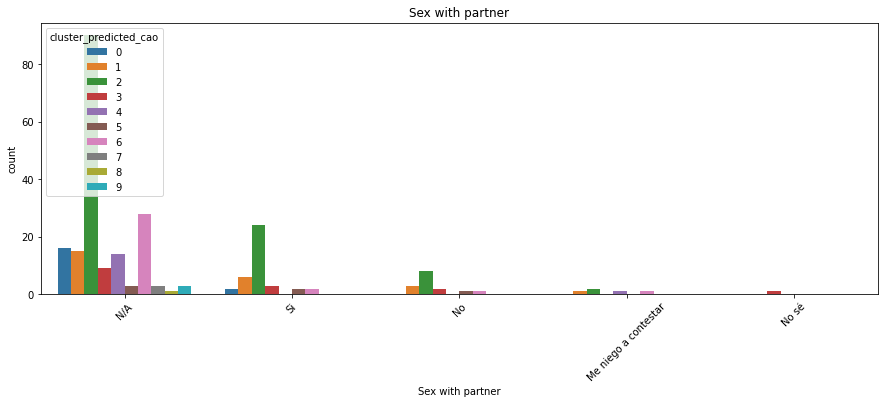

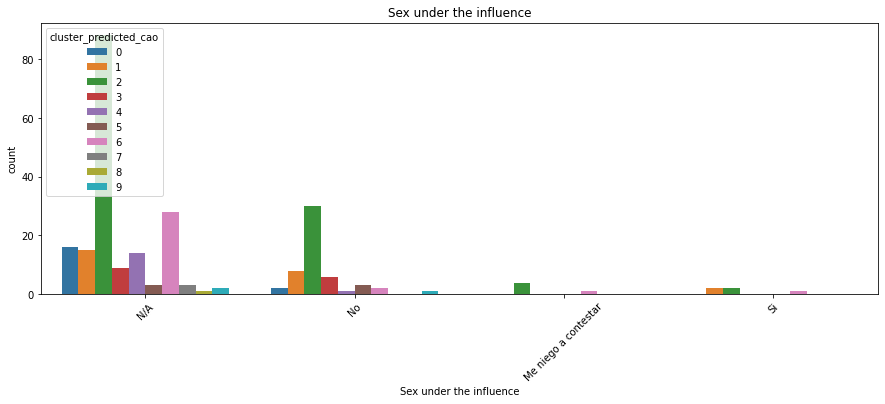

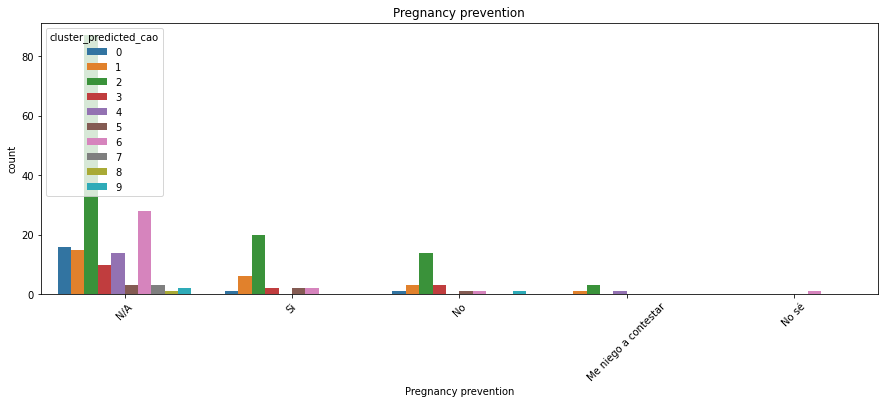

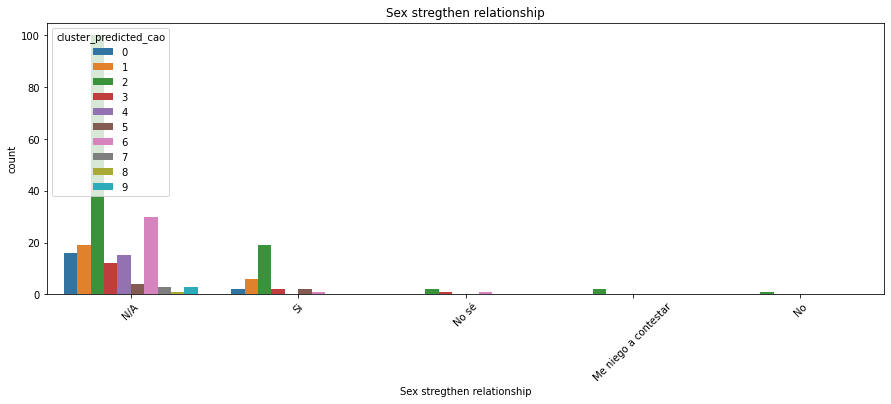

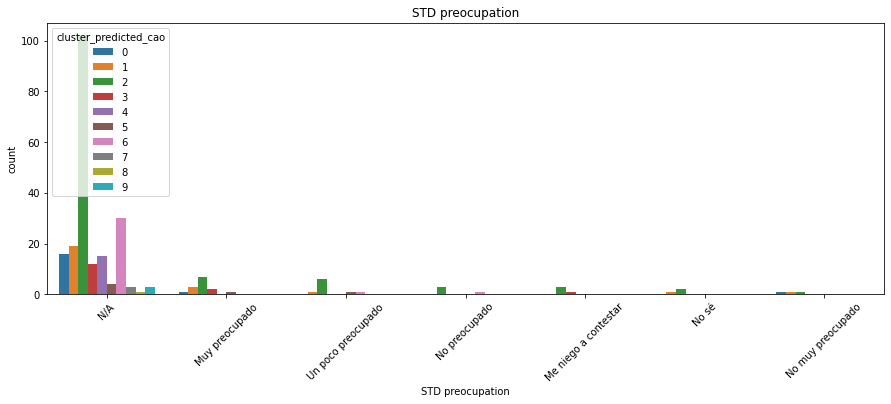

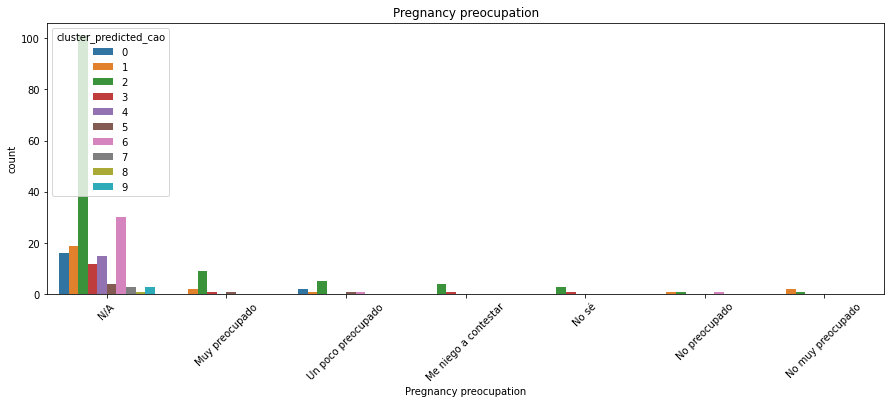

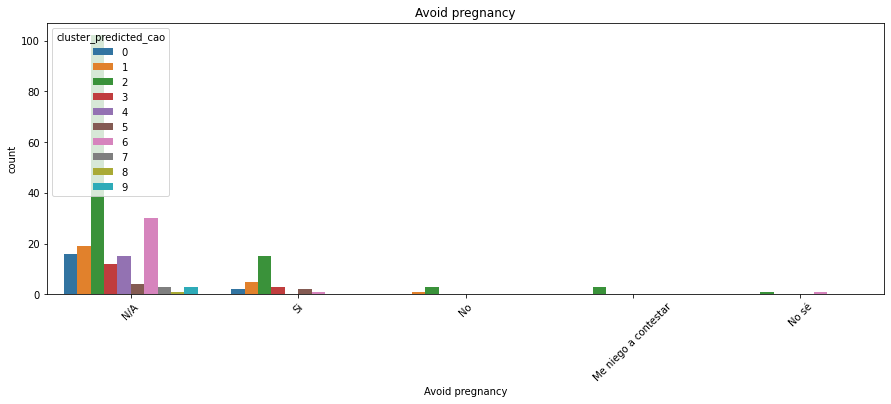

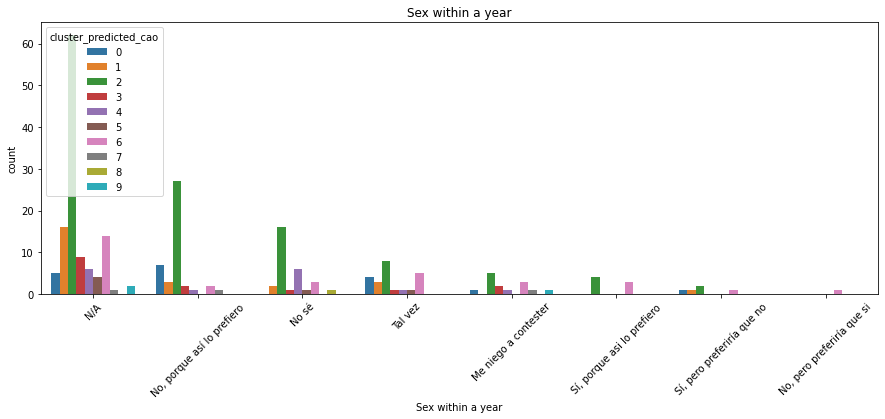

In [586]:
for i in preguntas_t:
    plt.subplots(figsize = (15,5))
    chart = sns.countplot(x = data_t[i],
                  order = data_t[i].value_counts().index,
                  hue = data_t['cluster_predicted_cao'])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title(i)
    plt.show()

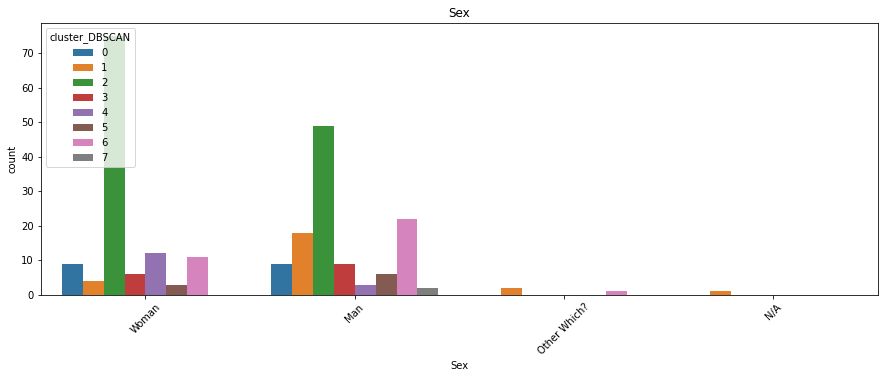

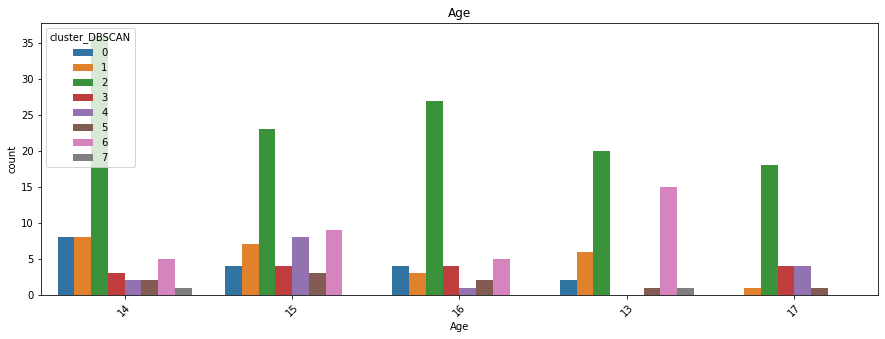

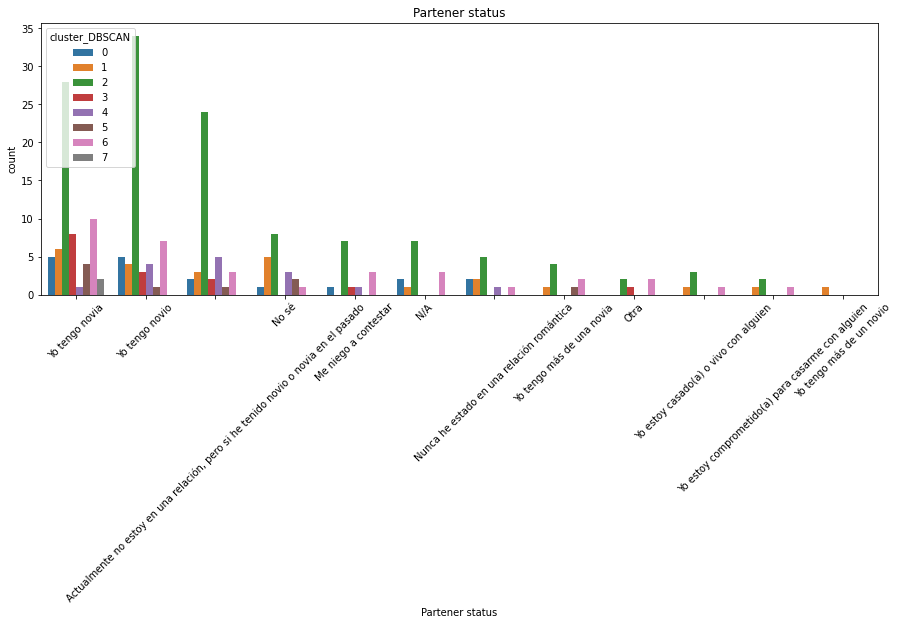

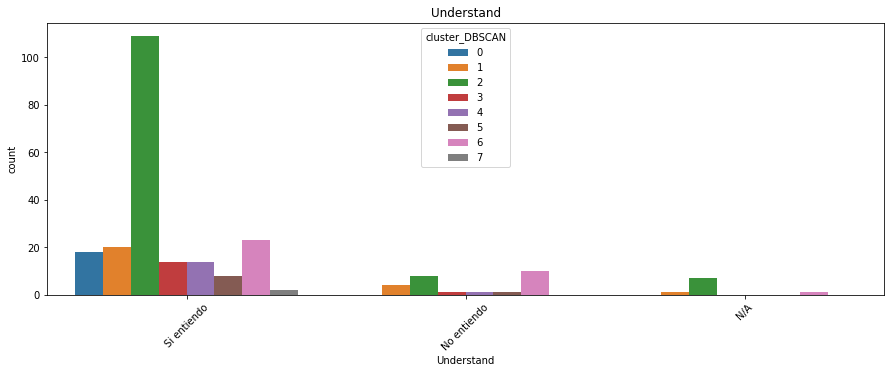

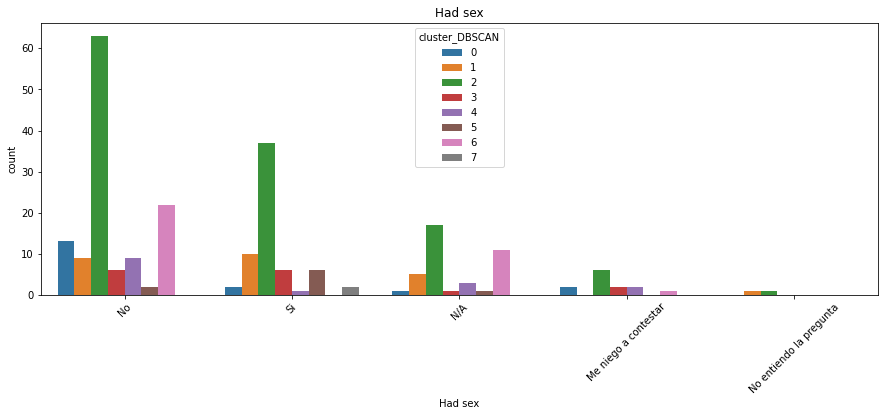

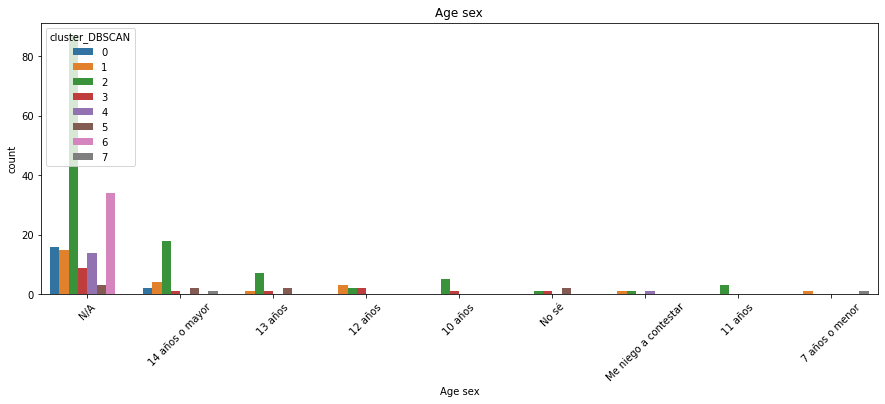

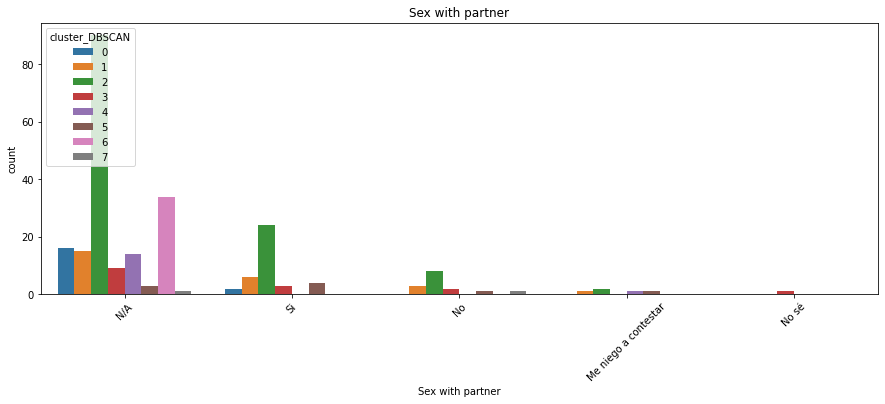

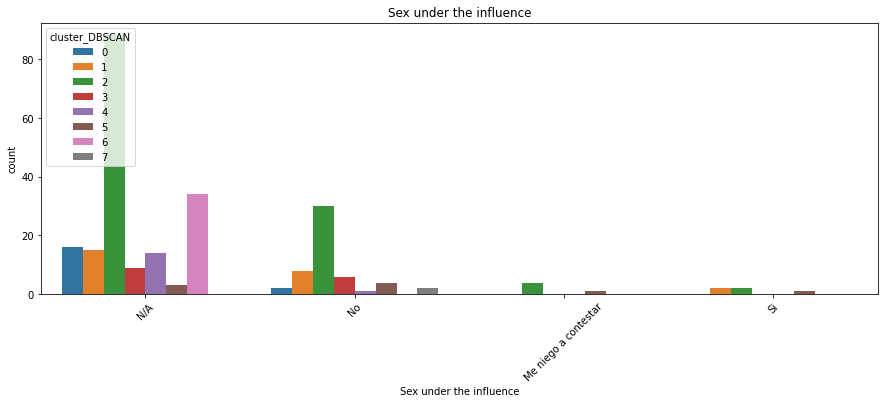

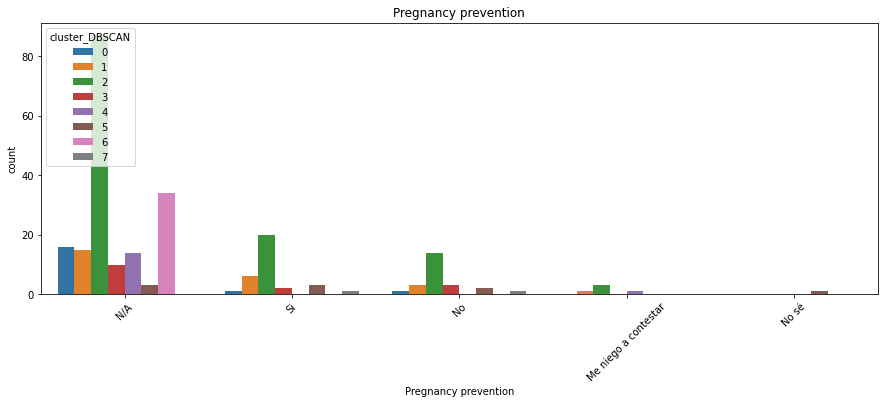

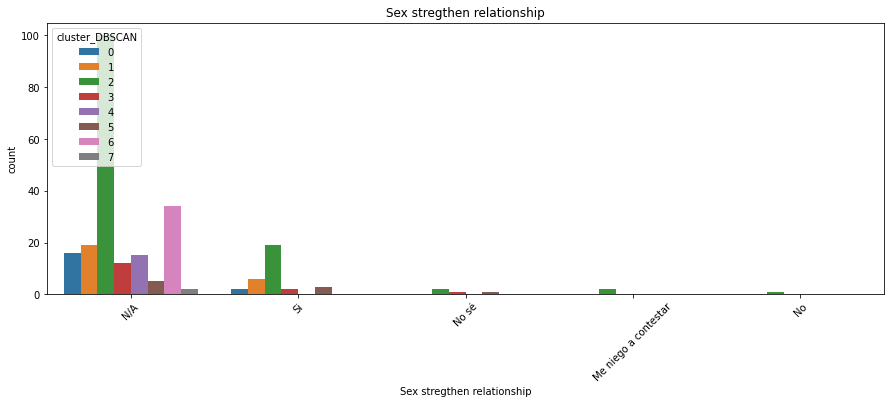

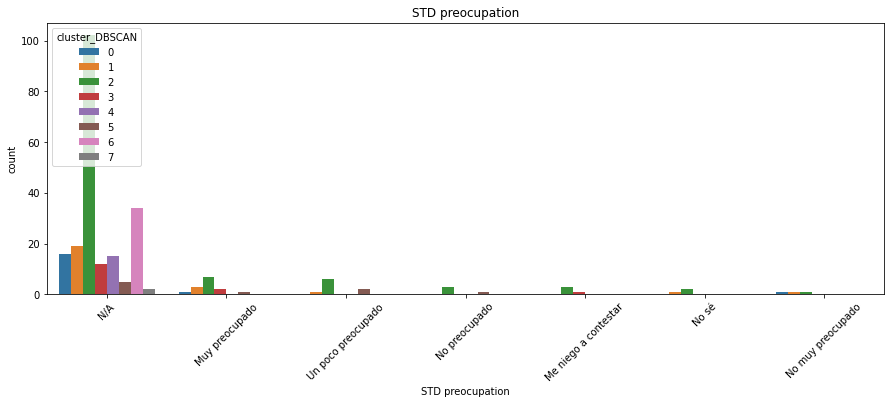

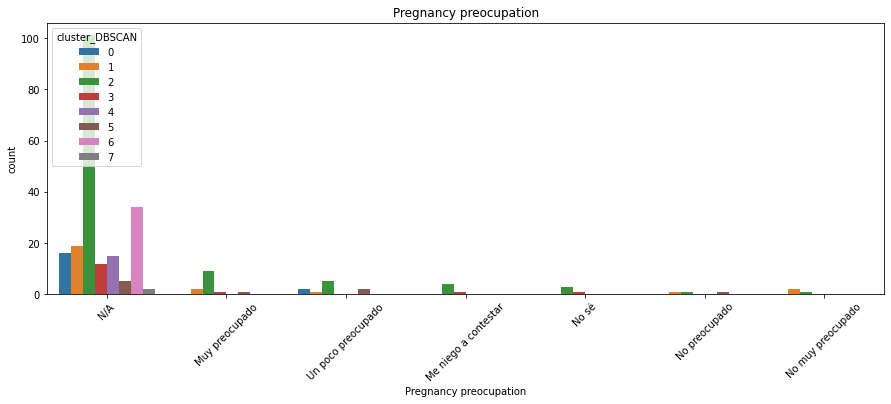

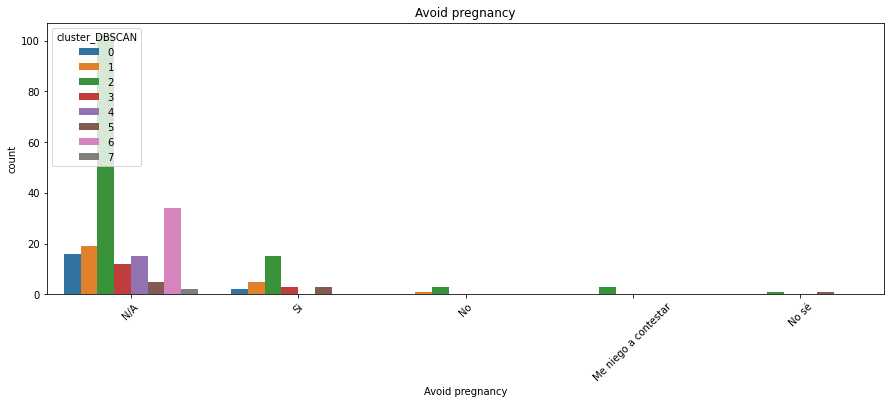

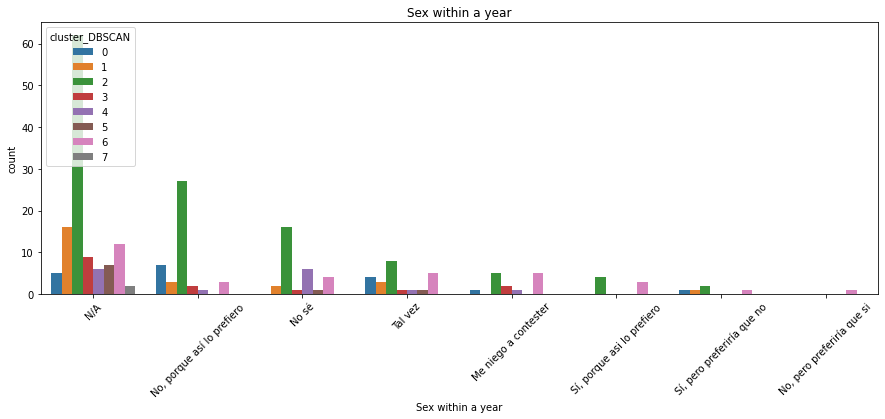

In [587]:
for i in preguntas_t:
    plt.subplots(figsize = (15,5))
    chart = sns.countplot(x = data_t[i],
                  order = data_t[i].value_counts().index,
                  hue = data_t["cluster_DBSCAN"])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title(i)
    plt.show()

In [588]:
data_t.to_excel('data_t.xlsx')

In [589]:
data_t.groupby(['cluster_predicted_cao']).size()

cluster_predicted_cao
0     18
1     25
2    124
3     15
4     15
5      6
6     32
7      3
8      1
9      3
dtype: int64

In [590]:
data_t.groupby(['cluster_predicted_huang']).size()

cluster_predicted_huang
0     18
1     25
2    124
3     15
4     15
5      6
6     19
7     10
8      8
9      2
dtype: int64

In [592]:
data_t.groupby(['cluster_DBSCAN']).size()

cluster_DBSCAN
0     18
1     25
2    124
3     15
4     15
5      9
6     34
7      2
dtype: int64

In [502]:
data_t.groupby(['cluster_predicted_huang']).agg(pd.Series.mode)

/Users/isabellarodas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")


,ID,Sex,Age,Partener status,Understand,Had sex,Age sex,Sex with partner,Sex under the influence,Pregnancy prevention,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Avoid pregnancy,Sex within a year,cluster_predicted_cao,cluster_DBSCAN
cluster_predicted_huang,,,,,,,,,,,,,,,,,
0,"[i11, i14, i17, i18, i19, i25, i26, i28, i29, ...",Man,13,Yo tengo novia,Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,1
1,"[i12, i2, i20, i21, i23, i27, i33, i39, i5, i9]",Man,13,Yo tengo novio,Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,1
2,"[i10, i15, i16, i22, i31, i37]","[Man, Woman]",13,"[Yo tengo novia, Yo tengo novio]",Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,1
3,"[i1, i13, i24, i32, i36]",Woman,"[14, 15]","[Actualmente no estoy en una relación, pero si...",Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,"[Me niego a contester, N/A]",0,1
4,"[i40, i41, i42, i43, i44, i45, i46, i47, i48, ...",Man,14,Yo tengo novia,Si entiendo,Si,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,4,2
5,"[i218, i219, i220, i221, i65, i66, i67, i68, i...","[Man, Woman]",14,"[Yo tengo novia, Yo tengo novio]",Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,"No, porque así lo prefiero",5,3
7,"[i100, i101, i102, i103, i104, i105, i106, i10...",Woman,14,Yo tengo novio,Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,7,5
8,"[i203, i204, i205, i206, i207, i208, i209, i21...",Man,"[17, 16, 15]",Yo tengo novia,Si entiendo,"[No, Si]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,8,6
10,"[i222, i223, i224, i225, i226, i227, i228, i22...",Woman,15,"Actualmente no estoy en una relación, pero si ...",Si entiendo,No,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,"[N/A, No sé]",10,8


In [ ]:
# Distancia euclidianas con cero

In [ ]:
# Lasso multinomial

In [ ]:
# Sacar las caracteristicas de las redes

In [ ]:
# Que tipo de gente hay en cada uno 
# Lasso multinomial para clasificar gente en esos grupos. Predicción sesgada. 
# 